<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_751-800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2416]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2417]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [07:24:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bad size
RDKit ERROR: Violation occurred on line 964 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/MolDraw2D/MolDraw2D.cpp
RDKit ERROR: Failed Expression: !legends || legends->size() == mols.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [07:24:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bad size
RDKit ERROR: Violation occurred on line 964 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/MolDraw2D/MolDraw2D.cpp
RDKit ERROR: Failed Expression: !legends || legends->size() == mols.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [07:25:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bad size
RDKit ERROR: Violation occurred on line 964 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/MolDra

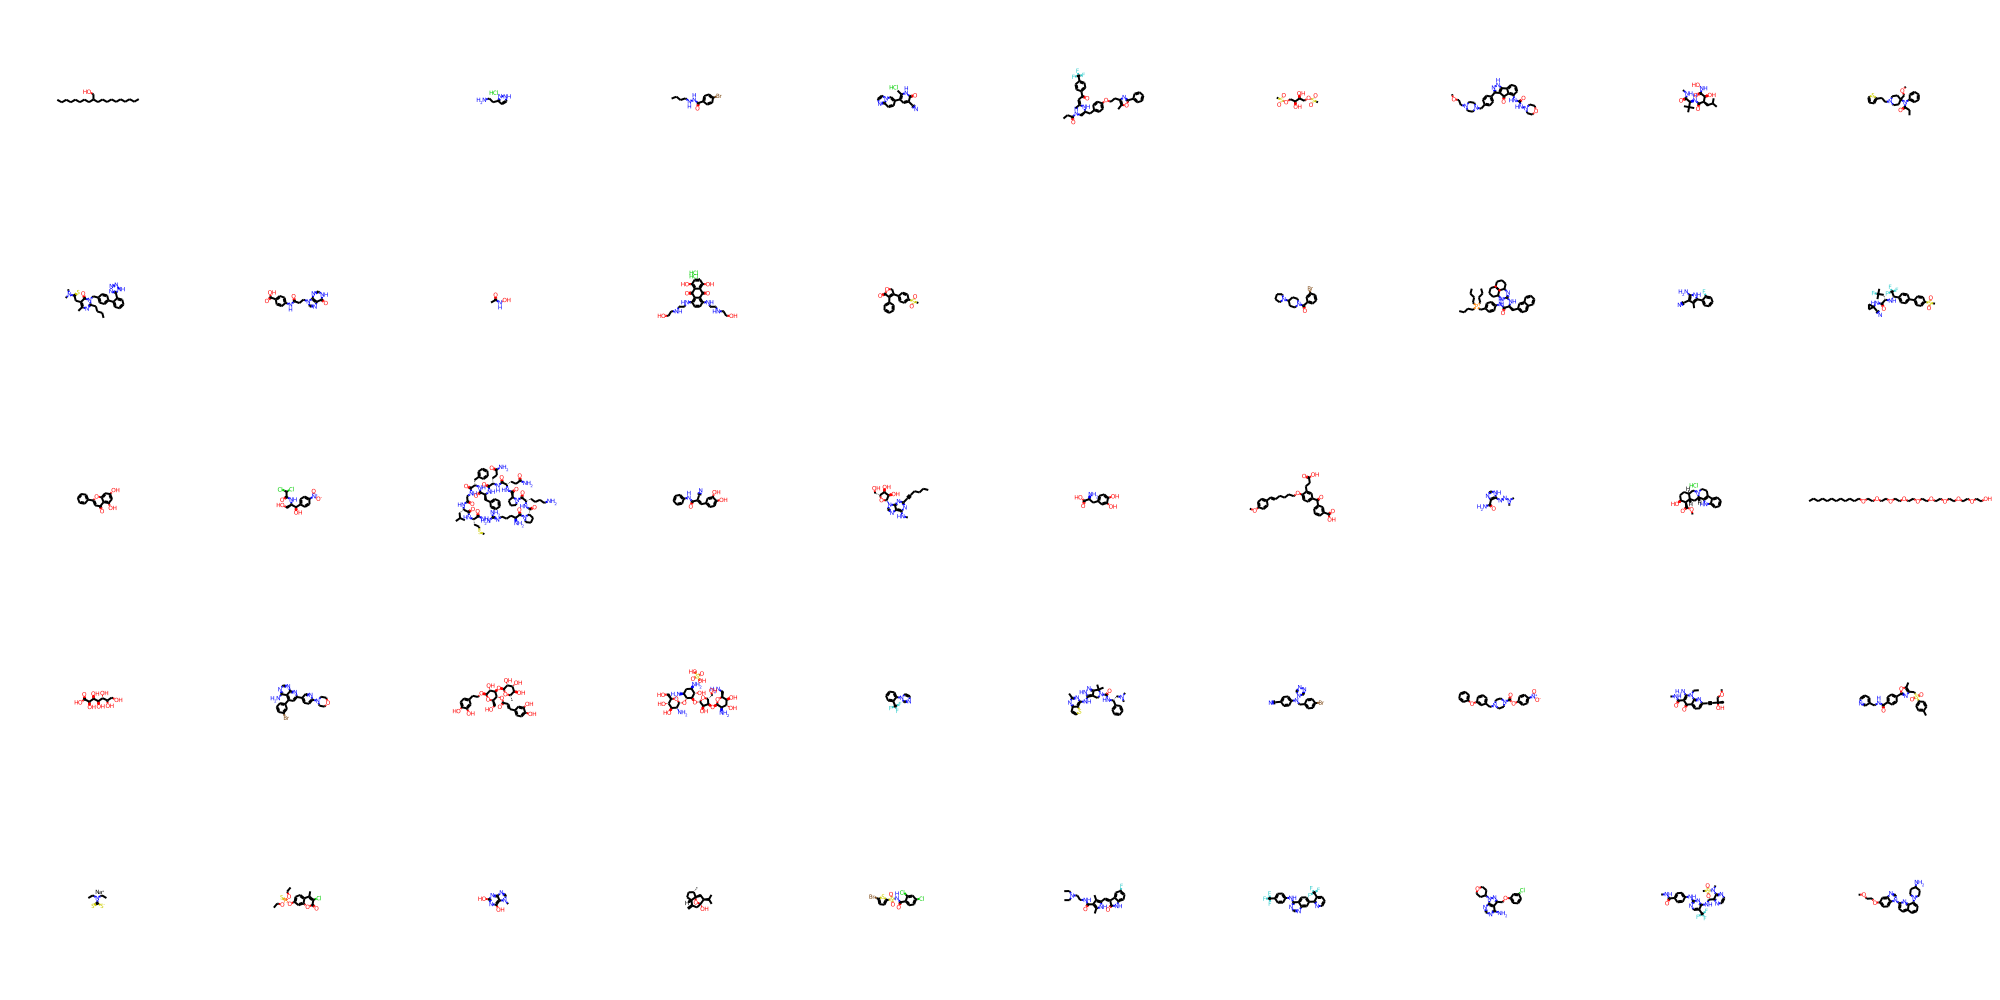

In [2418]:
smiles_list = [
'CCCCCCCCCCC(CO)CCCCCCCC',
'No Data',
'Cl.NCCc1cc[nH]n1',
'CCCCNNC(=O)c1ccc(Br)cc1',
'Cc1[nH]c(=O)c(C#N)cc1-c1ccc2nccn2c1.Cl',
'CCC(=O)NC[C@H](Cc1ccc(OCCc2nc(-c3ccccc3)oc2C)cc1)N/C(C)=C\C(=O)c1ccc(C(F)(F)F)cc1',
'CS(=O)(=O)OC[C@H](O)[C@@H](O)COS(C)(=O)=O',
'COCCN1CCN(Cc2ccc(-c3n[nH]c4c3C(=O)c3c(NC(=O)NN5CCOCC5)cccc3-4)cc2)CC1',
'CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](O)C(=O)NO)C(C)(C)C',
'CCC(=O)N(c1ccccc1)C1(COC)CCN(CCc2cccs2)CC1',
'CCCCc1nc(C)c(CC(=S)N(C)C)c(=O)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
'O=C(CCn1cnc2c(=O)[nH]cnc21)Nc1ccc(C(=O)O)cc1',
'CC(=O)NO',
'Cl.Cl.O=C1c2c(O)ccc(O)c2C(=O)c2c(NCCNCCO)ccc(NCCNCCO)c21',
'CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1',
'No Data',
'O=C(c1cccc(Br)c1)N1CCC(N2CCCC2)CC1',
'CCCC[P+](CCCC)(CCCC)Cc1ccc(NC(=O)[C@H](Cc2ccc3ccccc3c2)N/C(=N/C2CCCCC2)NC2CCCCC2)cc1',
'Cc1c(-c2ccccc2F)[nH]c(N)c1C#N',
'CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1',
'O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12',
'O=C(N[C@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl',
'CSCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCCN)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)CCCN=C(N)N)C(N)=O',
'N#C/C(=C\c1ccc(O)c(O)c1)C(=O)Nc1ccccc1',
'CCCCC#Cc1nc(NC)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2n1',
'N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O',
'COc1ccc(/C=C/CCCCOc2ccc(C(=O)c3cccc(C(=O)O)c3)cc2CCC(=O)O)cc1',
'CN(C)/N=N/c1[nH]cnc1C(N)=O',
'COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc45)[C@@H]3C[C@@H]21.Cl',
'CCCCCCCCCCCCOCCOCCOCCOCCOCCOCCOCCOCCOCCO',
'O=C(O)[C@H](O)[C@@H](O)[C@H](O)[C@H](O)C(O)CO',
'Nc1ncnc2nc(-c3ccc(N4CCOCC4)nc3)cc(-c3cccc(Br)c3)c12',
'C[C@@H]1O[C@@H](O[C@@H]2[C@@H](O)[C@H](OCCc3ccc(O)c(O)c3)O[C@H](CO)[C@H]2OC(=O)/C=C/c2ccc(O)c(O)c2)[C@H](O)[C@H](O)[C@H]1O',
'NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@@H]3[C@@H](O)[C@H](N)C[C@H](N)[C@H]3O[C@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3N)[C@@H]2O)[C@H](N)[C@@H](O)[C@@H]1O.O=S(=O)(O)O',
'FC(F)(F)c1ccccc1-n1ccnc1',
'Cc1nc(Nc2[nH]nc3c2CN(C(=O)N[C@H](CN(C)C)c2ccccc2)C3(C)C)c2sccc2n1',
'N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1',
'O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1',
'CCn1c(N)c(C(=O)NC)c(=O)c2ccc(C#C[C@@](C)(O)COC)nc21',
'Cc1ccc(S(=O)(=O)Cc2nc(-c3ccc(C(=O)NCc4cccnc4)cc3)oc2C)cc1',
'CCN(CC)C(=S)[S-].[Na+]',
'CCOP(=S)(OCC)Oc1ccc2c(C)c(Cl)c(=O)oc2c1',
'Cn1cnc2nc(O)nc(O)c21',
'C=C1C[C@@]2(O)O[C@@]3(C[C@H]2C(C)C)[C@@H](C)CC[C@@H]13',
'O=C(NS(=O)(=O)c1ccc(Br)s1)c1ccc(Cl)cc1Cl',
'CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c1C',
'FC(F)(F)c1ccc(Nc2ncnc3cc(-c4ncccc4C(F)(F)F)ccc23)cc1',
'Nc1ncnc2c1c(COc1cccc(Cl)c1)nn2C1CCOCC1',
'CNC(=O)c1ccc(Nc2ncc(C(F)(F)F)c(NCc3nccnc3N(C)S(C)(=O)=O)n2)cc1',
'COCCOc1ccc2c(c1)ncn2-c1ccc2cccc(N3CCC(N)CC3)c2n1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



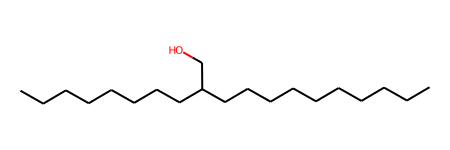

In [2419]:
M1 = mol_list [0]
M1

In [2420]:
M2 = mol_list [1]
M2

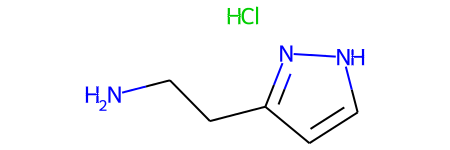

In [2421]:
M3 = mol_list [2]
M3

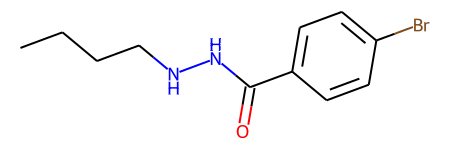

In [2422]:
M4 = mol_list [3]
M4

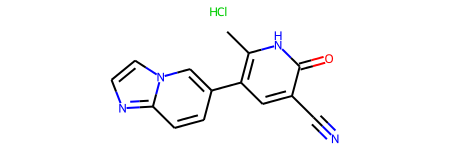

In [2423]:
M5 = mol_list [4]
M5

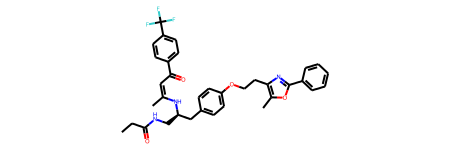

In [2424]:
M6 = mol_list [5]
M6

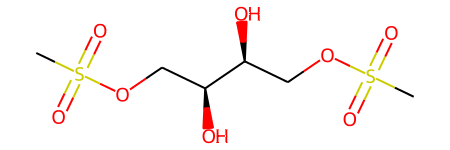

In [2425]:
M7 = mol_list [6]
M7

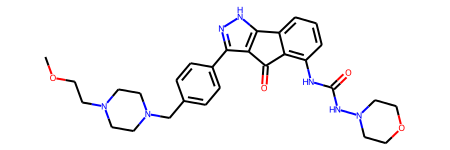

In [2426]:
M8 = mol_list [7]
M8

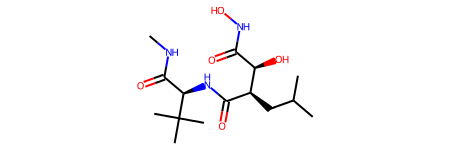

In [2427]:
M9 = mol_list [8]
M9

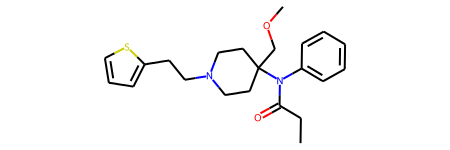

In [2428]:
M10= mol_list [9]
M10

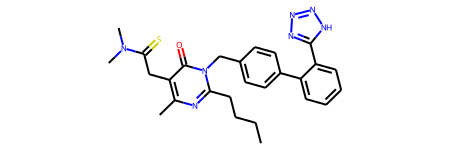

In [2429]:
M11= mol_list [10]
M11

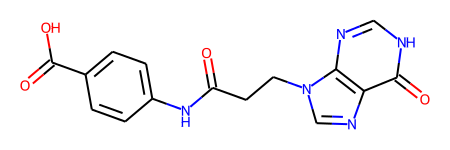

In [2430]:
M12= mol_list [11]
M12

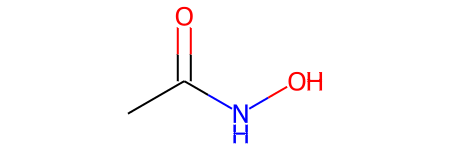

In [2431]:
M13= mol_list [12]
M13

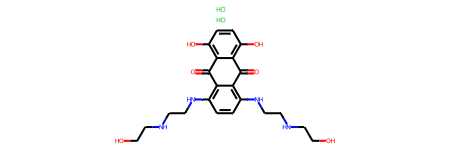

In [2432]:
M14= mol_list [13]
M14

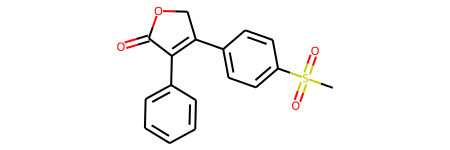

In [2433]:
M15= mol_list [14]
M15

In [2434]:
M16= mol_list [15]
M16

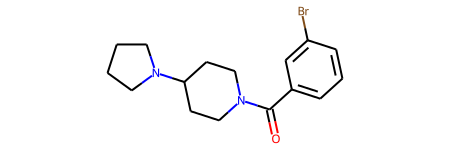

In [2435]:
M17= mol_list [16]
M17

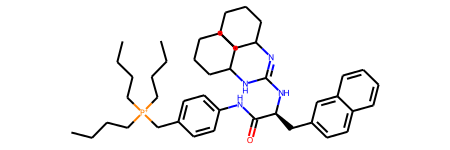

In [2436]:
M18= mol_list [17]
M18

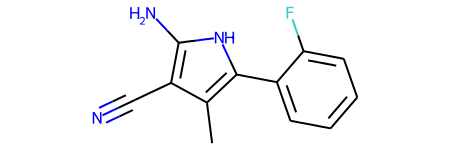

In [2437]:
M19= mol_list [18]
M19

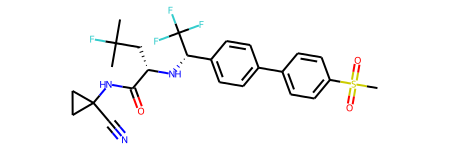

In [2438]:
M20= mol_list [19]
M20

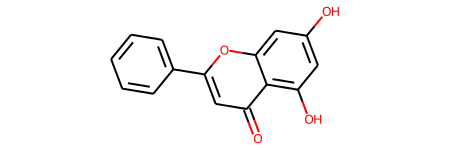

In [2439]:
M21= mol_list [20]
M21

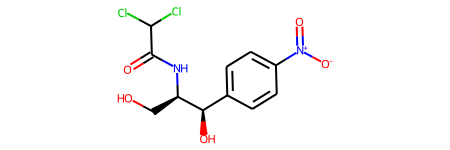

In [2440]:
M22= mol_list [21]
M22

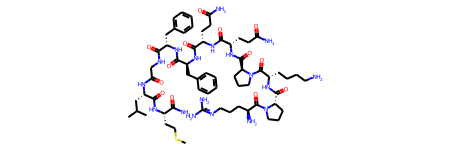

In [2441]:
M23= mol_list [22]
M23

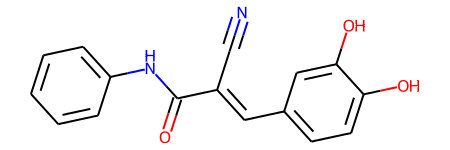

In [2442]:
M24= mol_list [23]
M24

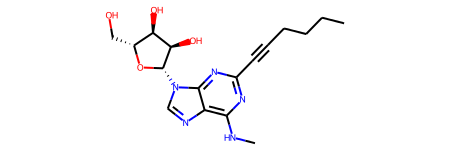

In [2443]:
M25= mol_list [24]
M25

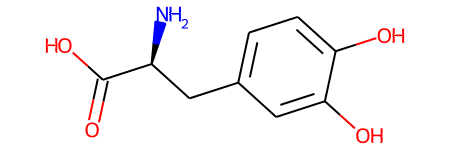

In [2444]:
M26= mol_list [25]
M26

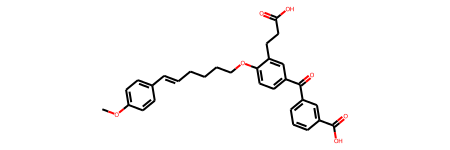

In [2445]:
M27= mol_list [26]
M27

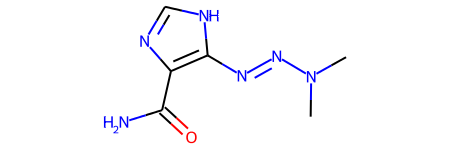

In [2446]:
M28= mol_list [27]
M28

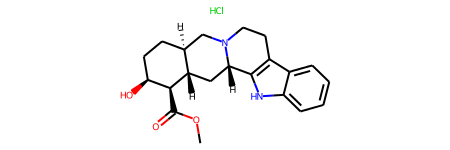

In [2447]:
M29= mol_list [28]
M29

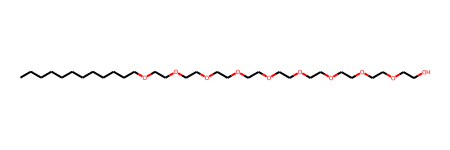

In [2448]:
M30= mol_list [29]
M30

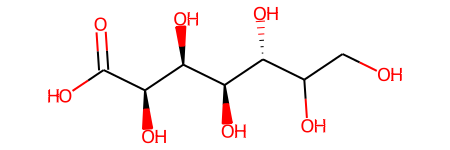

In [2449]:
M31= mol_list [30]
M31

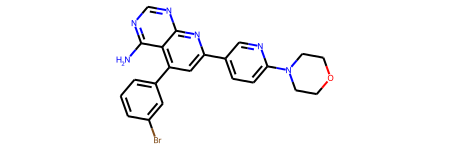

In [2450]:
M32= mol_list [31]
M32

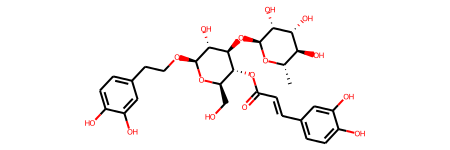

In [2451]:
M33= mol_list [32]
M33

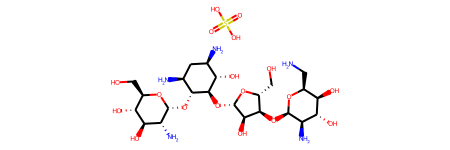

In [2452]:
M34= mol_list [33]
M34

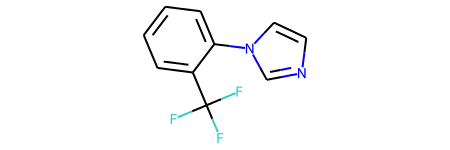

In [2453]:
M35= mol_list [34]
M35

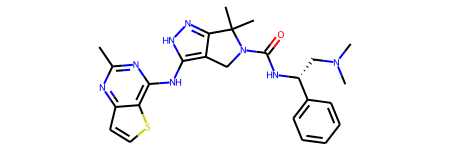

In [2454]:
M36= mol_list [35]
M36

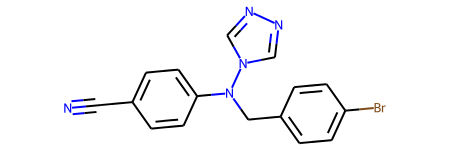

In [2455]:
M37= mol_list [36]
M37

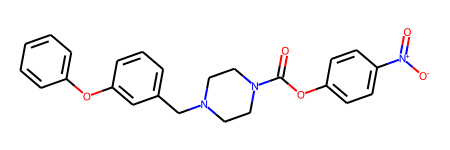

In [2456]:
M38= mol_list [37]
M38


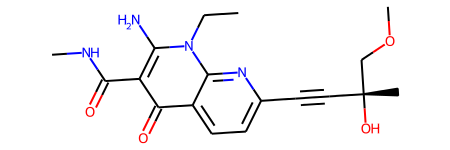

In [2457]:
M39= mol_list [38]
M39

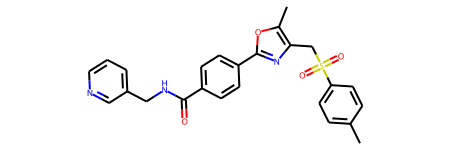

In [2458]:
M40= mol_list [39]
M40

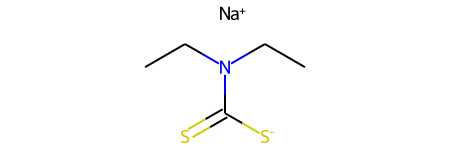

In [2459]:
M41= mol_list [40]
M41

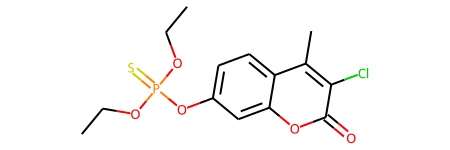

In [2460]:
M42= mol_list [41]
M42

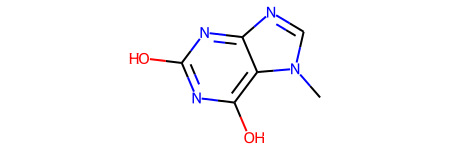

In [2461]:
M43= mol_list [42]
M43

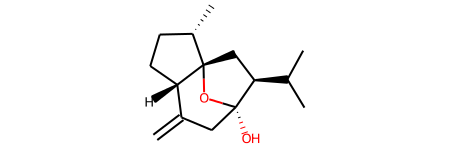

In [2462]:
M44= mol_list [43]
M44

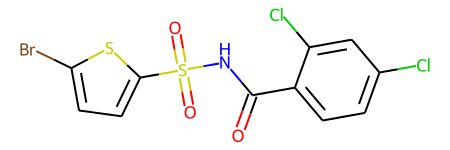

In [2463]:
M45= mol_list [44]
M45

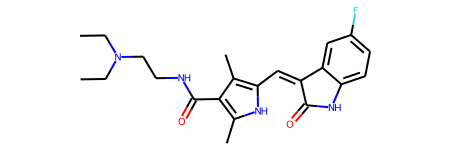

In [2464]:
M46= mol_list [45]
M46

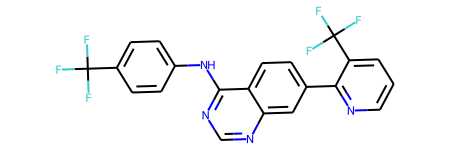

In [2465]:
M47= mol_list [46]
M47

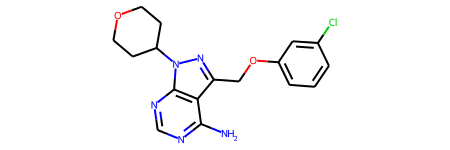

In [2466]:
M48= mol_list [47]
M48

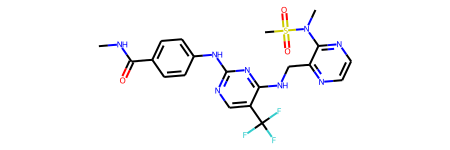

In [2467]:
M49= mol_list [48]
M49

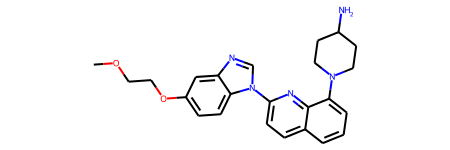

In [2468]:
M50= mol_list [49]
M50

In [2469]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 33,
 80,
 119,
 205,
 222,
 259,
 294,
 396,
 420,
 475,
 482,
 506,
 591,
 739,
 794,
 807,
 887]

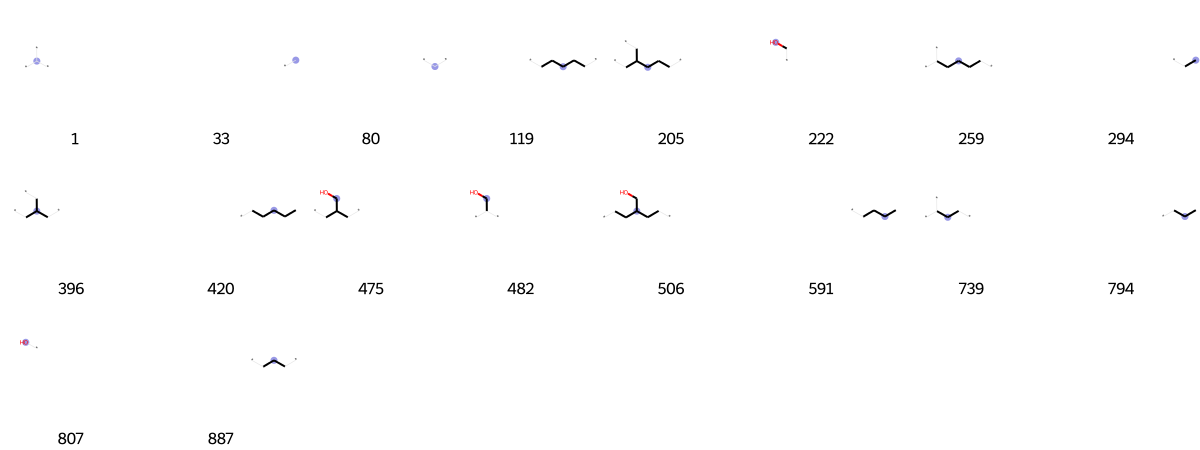

In [2470]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2471]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[69,
 80,
 90,
 144,
 147,
 183,
 219,
 281,
 356,
 378,
 482,
 514,
 695,
 724,
 726,
 803,
 816,
 823,
 849,
 953,
 980,
 981]

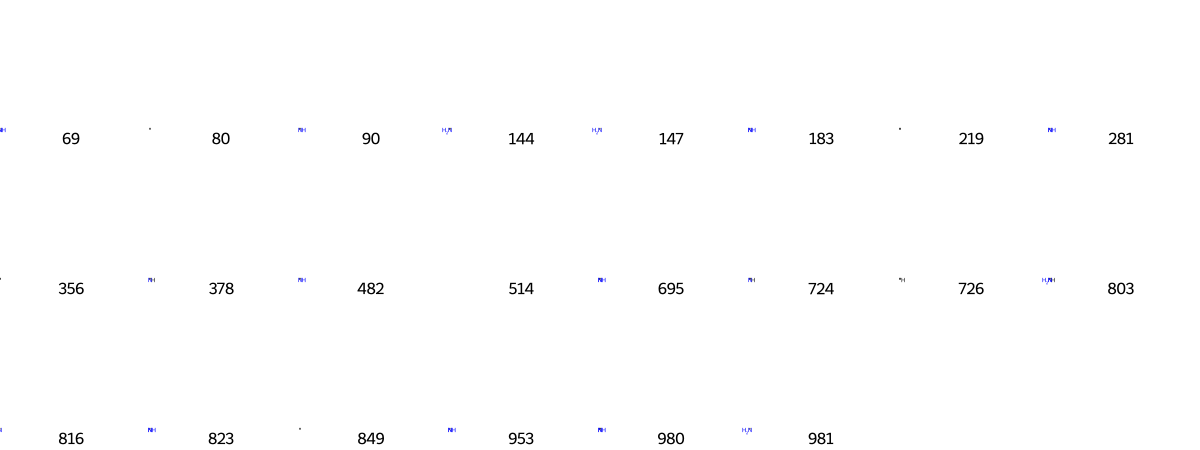

In [2472]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2473]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 80,
 128,
 133,
 294,
 304,
 323,
 356,
 361,
 464,
 486,
 588,
 591,
 607,
 625,
 641,
 650,
 662,
 667,
 673,
 726,
 728,
 745,
 794,
 807,
 849,
 887,
 893,
 895,
 909]

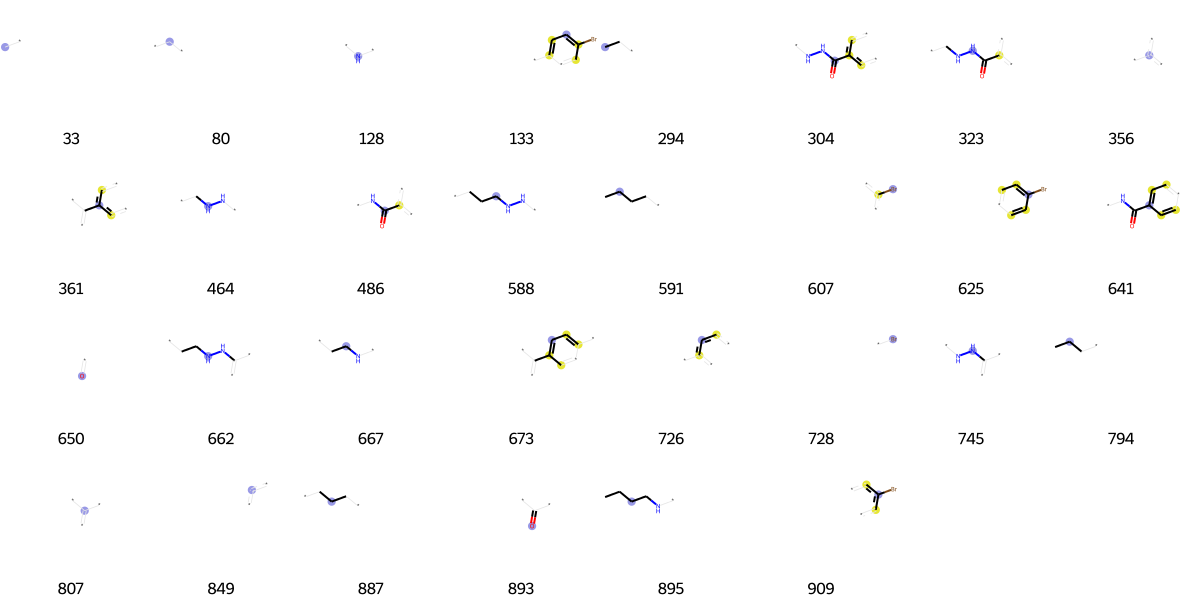

In [2474]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2475]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 77,
 90,
 112,
 136,
 202,
 280,
 287,
 314,
 352,
 356,
 360,
 361,
 378,
 387,
 428,
 448,
 464,
 493,
 503,
 514,
 571,
 586,
 594,
 650,
 651,
 674,
 675,
 692,
 698,
 721,
 725,
 726,
 750,
 790,
 819,
 838,
 842,
 849,
 875,
 877,
 896,
 935,
 974]

In [2476]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 10,
 13,
 19,
 23,
 33,
 41,
 55,
 64,
 79,
 80,
 90,
 96,
 102,
 114,
 117,
 128,
 136,
 153,
 155,
 163,
 175,
 197,
 219,
 236,
 294,
 310,
 322,
 356,
 361,
 378,
 383,
 389,
 393,
 428,
 429,
 481,
 506,
 551,
 580,
 602,
 606,
 641,
 643,
 650,
 656,
 660,
 666,
 673,
 694,
 695,
 698,
 718,
 720,
 726,
 730,
 733,
 736,
 777,
 807,
 809,
 831,
 835,
 849,
 857,
 873,
 893,
 894,
 898,
 904,
 911,
 913,
 979,
 1017]

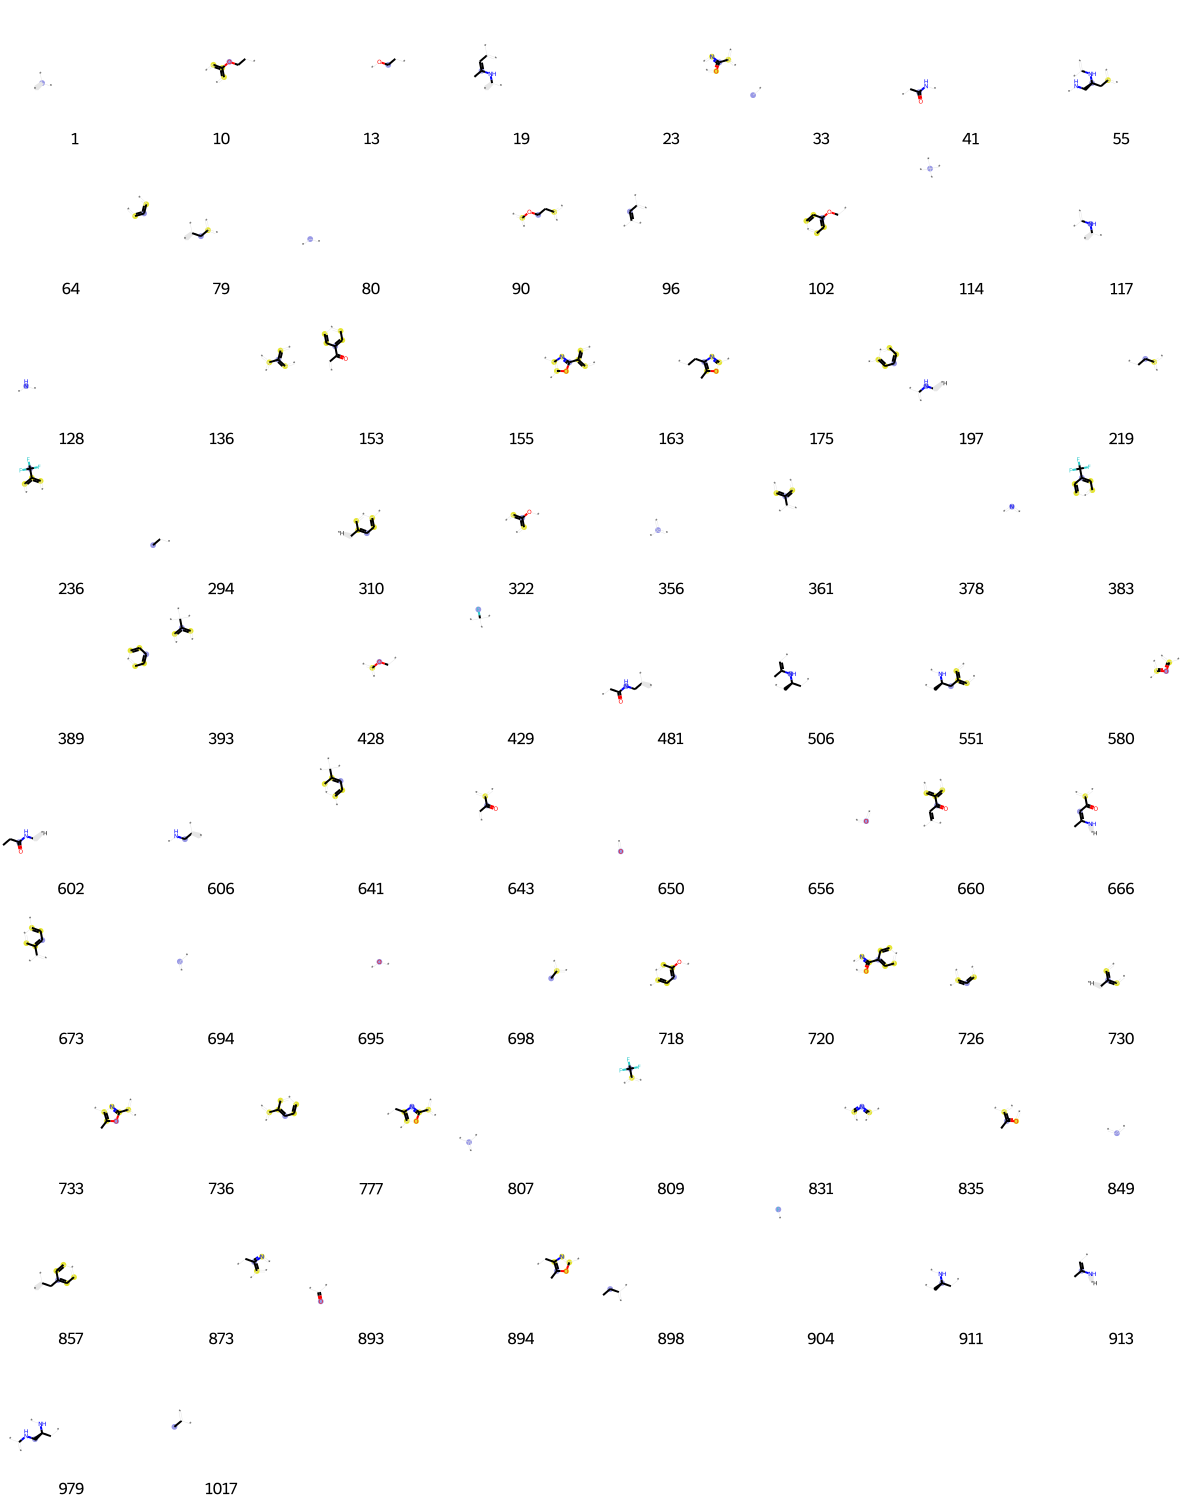

In [2477]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2478]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 33,
 80,
 91,
 118,
 123,
 227,
 345,
 350,
 452,
 473,
 650,
 692,
 695,
 706,
 807,
 865,
 888]

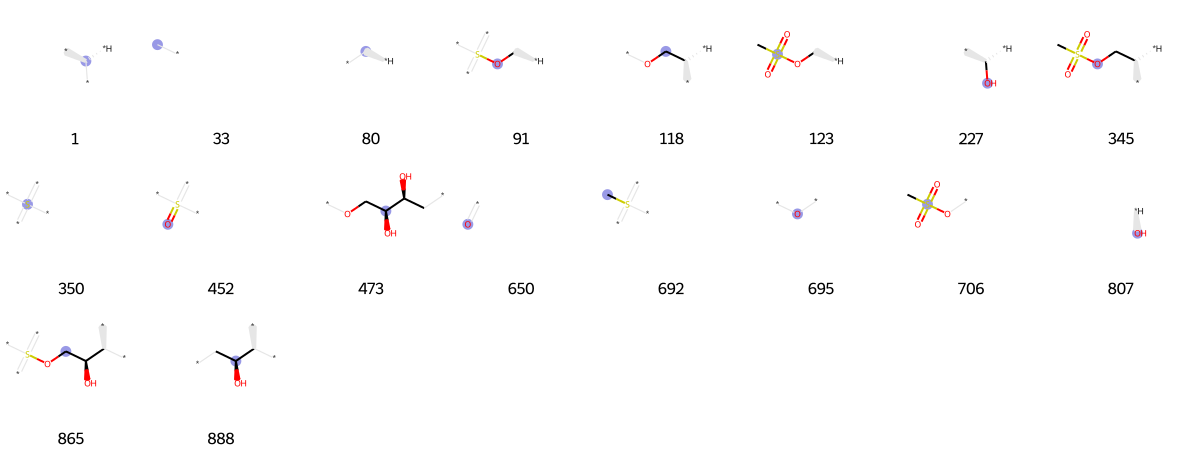

In [2479]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2480]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[13,
 15,
 33,
 64,
 74,
 80,
 88,
 90,
 109,
 121,
 128,
 129,
 136,
 155,
 166,
 182,
 200,
 241,
 310,
 314,
 319,
 323,
 352,
 356,
 378,
 381,
 417,
 448,
 452,
 456,
 458,
 471,
 486,
 516,
 523,
 533,
 573,
 587,
 589,
 650,
 656,
 659,
 672,
 695,
 701,
 723,
 726,
 730,
 732,
 741,
 747,
 767,
 772,
 782,
 784,
 792,
 807,
 841,
 849,
 893,
 896,
 926,
 935,
 950,
 965,
 980,
 984,
 1005,
 1013]

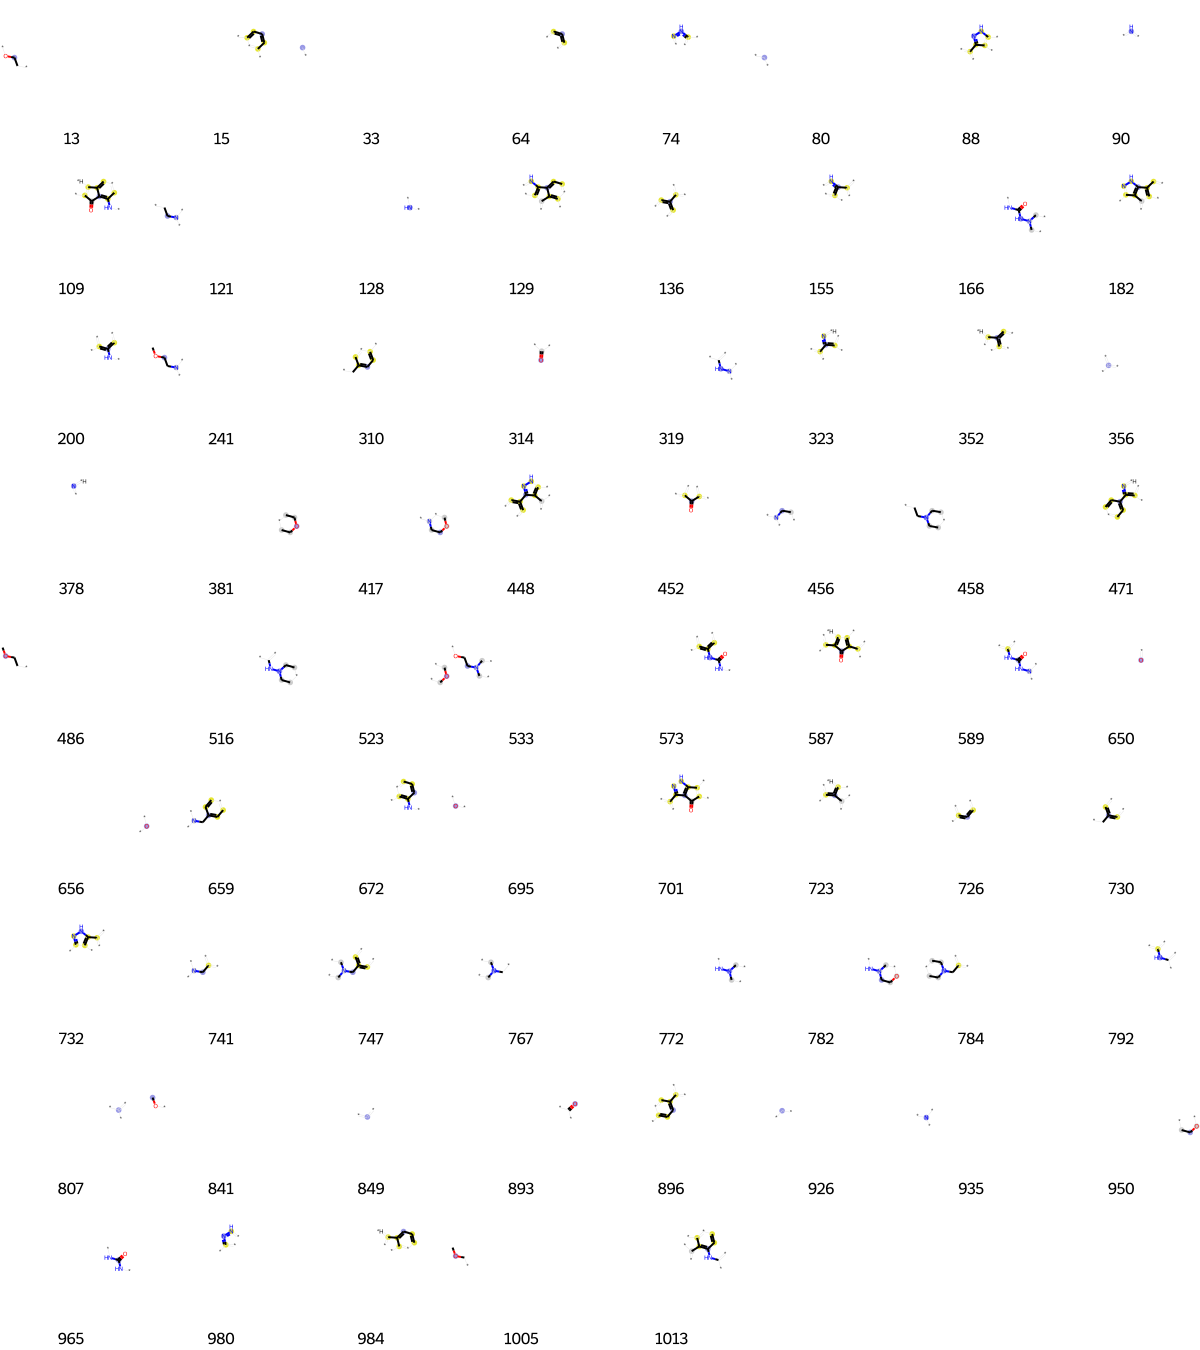

In [2481]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2482]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 33,
 80,
 114,
 117,
 128,
 191,
 227,
 259,
 283,
 345,
 387,
 392,
 406,
 420,
 439,
 483,
 507,
 533,
 573,
 607,
 618,
 650,
 680,
 749,
 759,
 807,
 822,
 823,
 847,
 871,
 878,
 893,
 906,
 993]

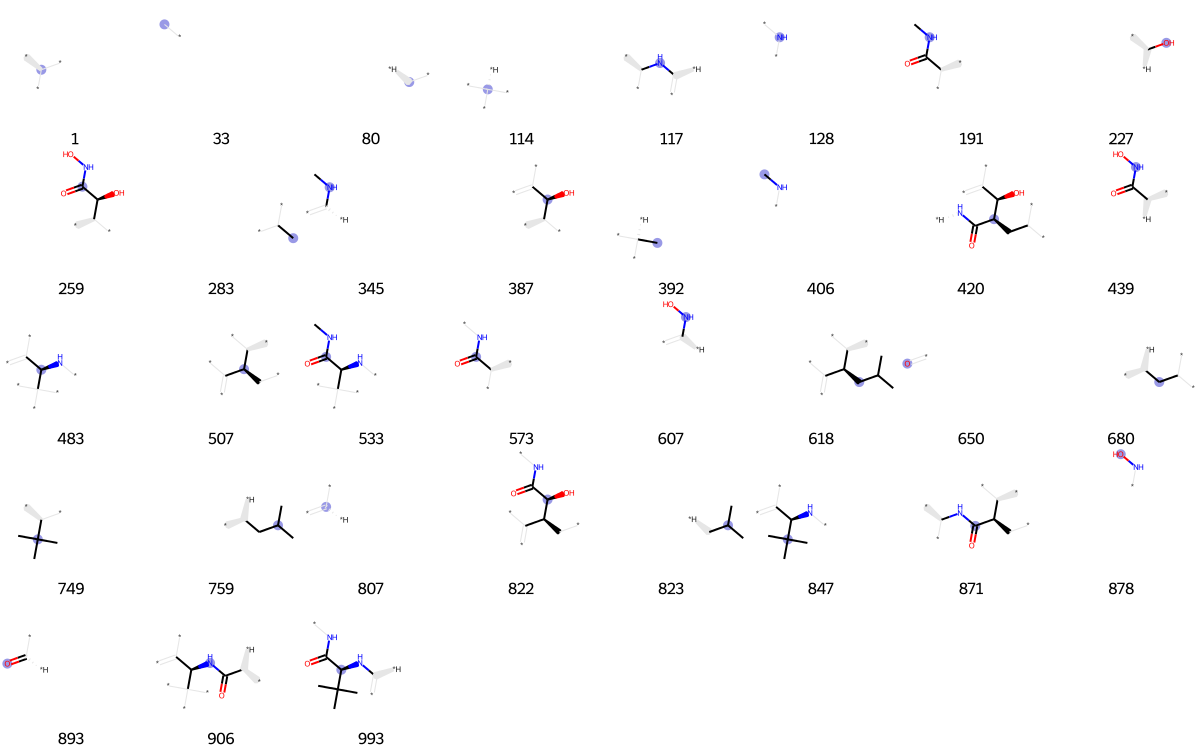

In [2483]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2484]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[10,
 14,
 33,
 36,
 41,
 64,
 72,
 80,
 121,
 138,
 175,
 196,
 214,
 218,
 219,
 232,
 237,
 240,
 241,
 256,
 288,
 294,
 356,
 383,
 389,
 456,
 458,
 507,
 543,
 605,
 616,
 650,
 656,
 675,
 695,
 726,
 767,
 807,
 841,
 849,
 880,
 881,
 893,
 898,
 915,
 916,
 926,
 927,
 929,
 935,
 1005,
 1013]

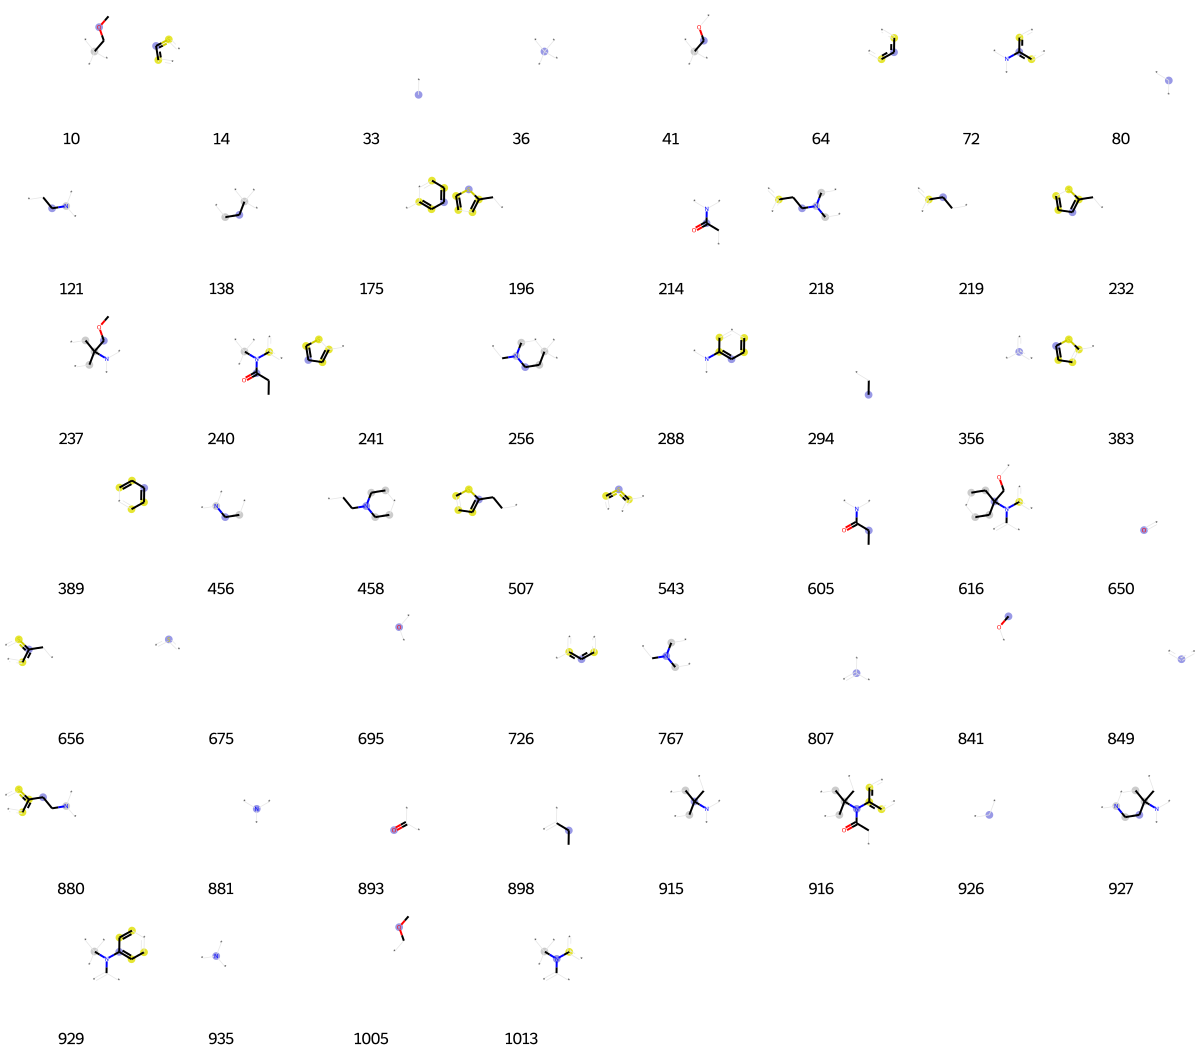

In [2485]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2486]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 64,
 73,
 74,
 80,
 90,
 92,
 97,
 110,
 136,
 139,
 140,
 169,
 175,
 186,
 219,
 222,
 293,
 294,
 310,
 314,
 318,
 325,
 335,
 352,
 356,
 378,
 504,
 510,
 561,
 585,
 591,
 629,
 650,
 659,
 667,
 698,
 726,
 730,
 737,
 741,
 752,
 786,
 794,
 802,
 807,
 817,
 818,
 831,
 841,
 849,
 873,
 881,
 887,
 896,
 922,
 929,
 935,
 936,
 975,
 979,
 984,
 987,
 1010]

In [2487]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[41,
 53,
 71,
 80,
 90,
 106,
 114,
 121,
 128,
 191,
 314,
 351,
 356,
 358,
 361,
 378,
 389,
 409,
 428,
 431,
 433,
 456,
 540,
 650,
 672,
 673,
 700,
 713,
 726,
 750,
 774,
 792,
 806,
 807,
 830,
 834,
 843,
 849,
 884,
 893,
 901,
 932,
 935,
 940,
 954,
 998]

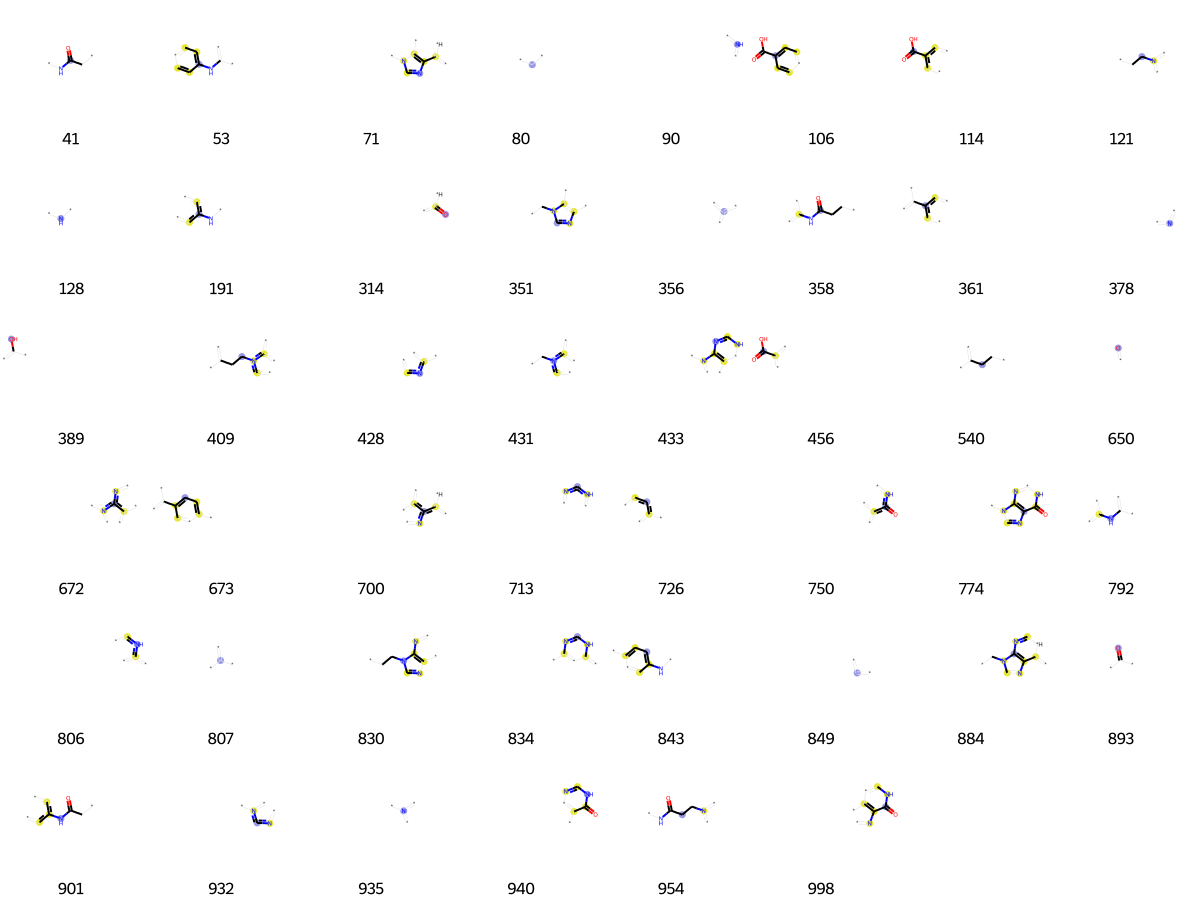

In [2488]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2489]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33, 128, 239, 245, 607, 650, 807, 878, 893, 1017]

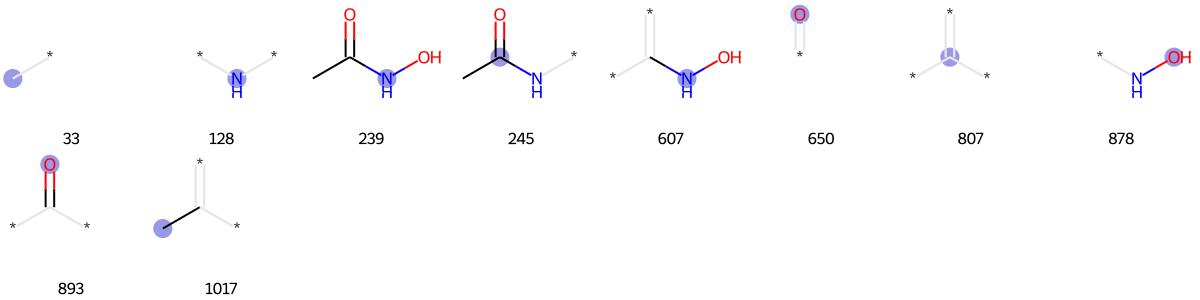

In [2490]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2491]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[80,
 94,
 128,
 200,
 222,
 298,
 314,
 356,
 392,
 410,
 437,
 447,
 451,
 452,
 473,
 493,
 514,
 578,
 583,
 587,
 650,
 667,
 723,
 726,
 766,
 807,
 832,
 849,
 897,
 899,
 1004]

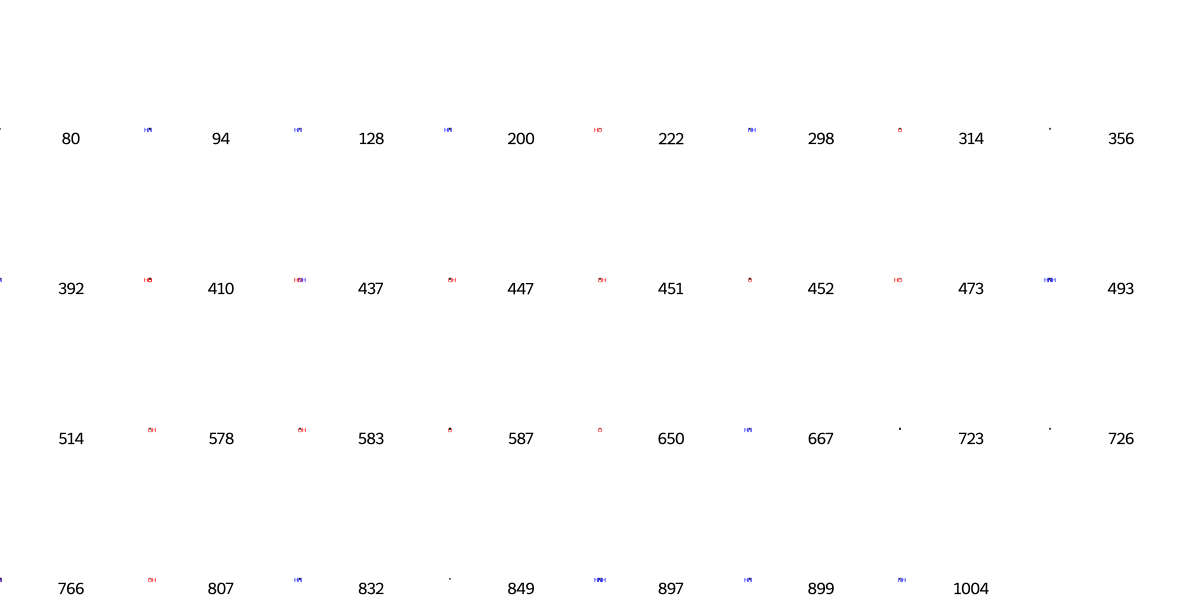

In [2492]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2493]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 64,
 89,
 136,
 164,
 175,
 252,
 314,
 319,
 350,
 354,
 356,
 389,
 441,
 452,
 502,
 528,
 570,
 609,
 643,
 650,
 656,
 692,
 715,
 726,
 736,
 758,
 849,
 896,
 926,
 949,
 960]

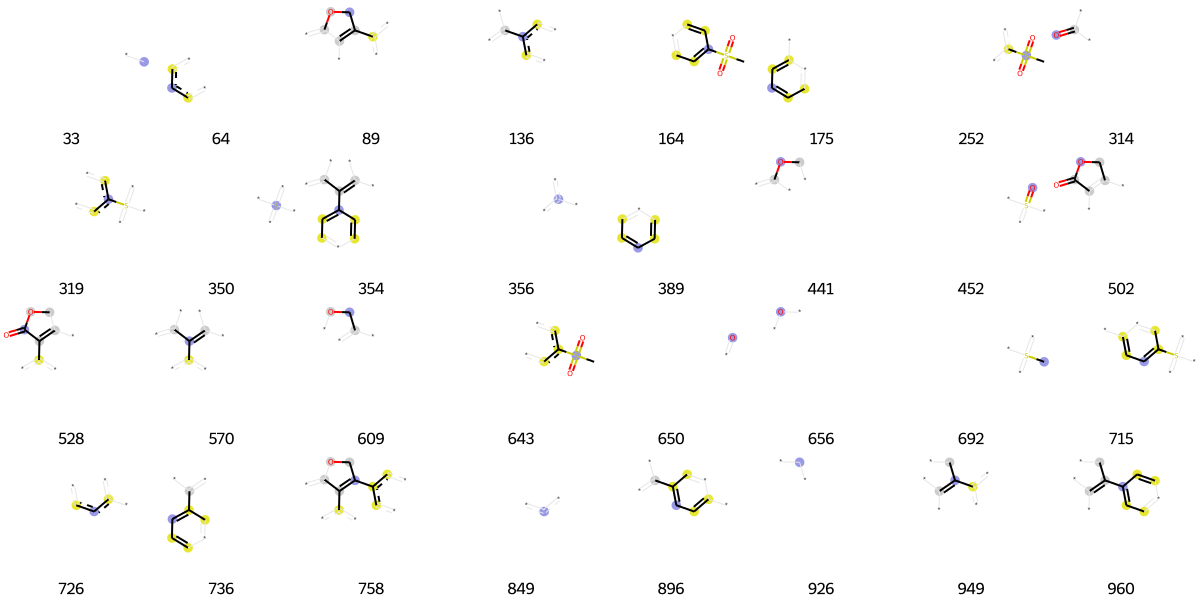

In [2494]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2495]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[4,
 15,
 64,
 294,
 301,
 356,
 361,
 440,
 456,
 480,
 485,
 497,
 500,
 558,
 607,
 618,
 650,
 652,
 726,
 728,
 766,
 807,
 830,
 847,
 849,
 875,
 886,
 893,
 909,
 926,
 935,
 942,
 961,
 974,
 985,
 1019]

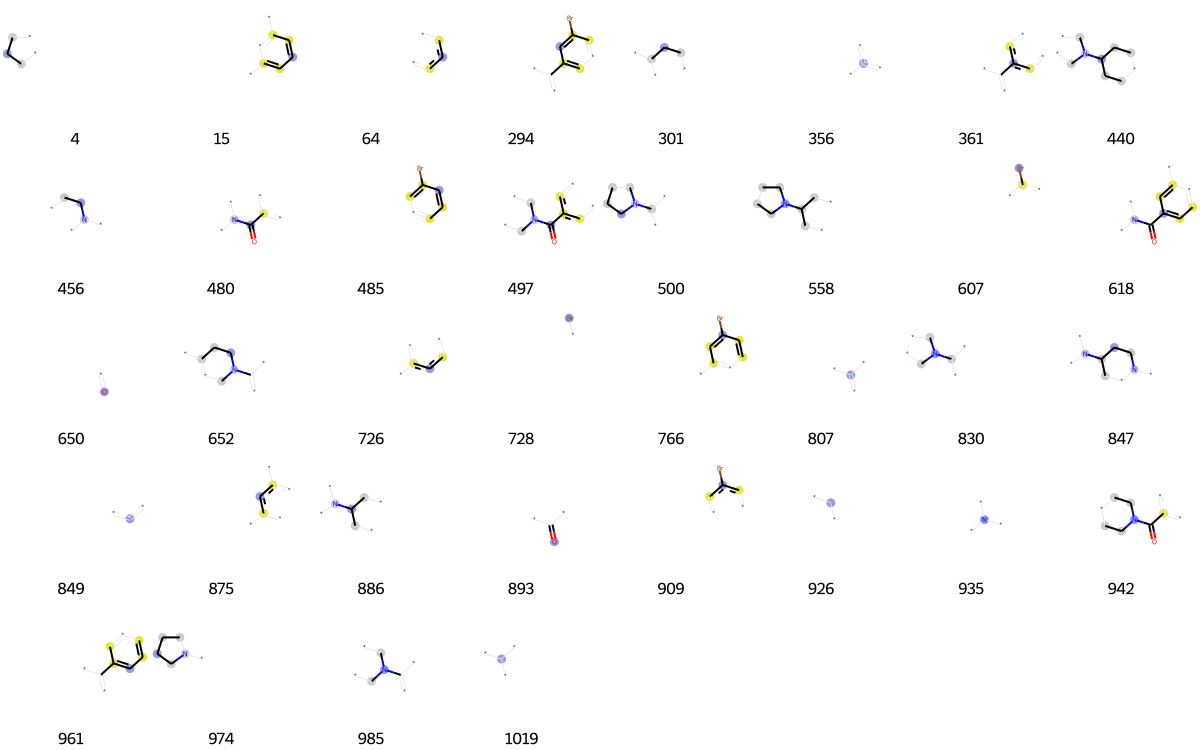

In [2496]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2497]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 2,
 4,
 33,
 53,
 63,
 64,
 79,
 80,
 83,
 88,
 97,
 117,
 128,
 136,
 175,
 191,
 203,
 294,
 301,
 304,
 310,
 317,
 322,
 356,
 363,
 385,
 387,
 428,
 506,
 534,
 539,
 563,
 573,
 591,
 592,
 598,
 610,
 631,
 640,
 645,
 650,
 725,
 726,
 730,
 736,
 739,
 792,
 794,
 807,
 831,
 843,
 849,
 871,
 875,
 887,
 890,
 893,
 926,
 957,
 966,
 969,
 982,
 985,
 1019]

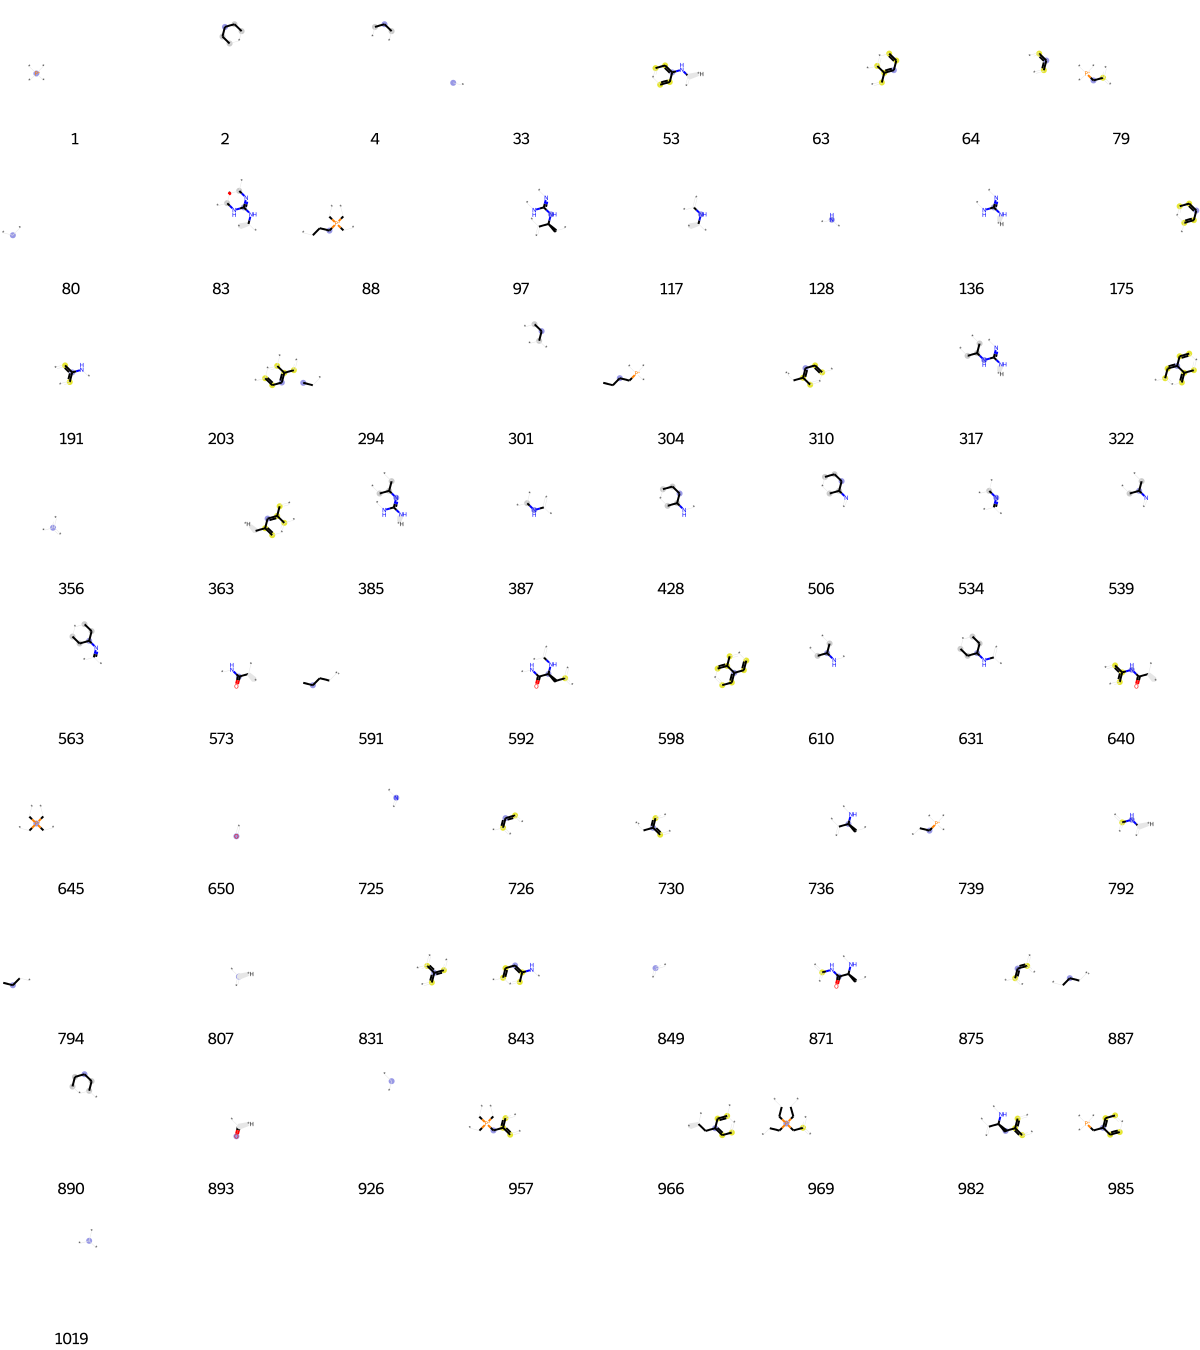

In [2498]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2499]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[8,
 32,
 33,
 64,
 90,
 112,
 145,
 147,
 155,
 175,
 206,
 213,
 252,
 347,
 352,
 356,
 358,
 360,
 433,
 449,
 451,
 547,
 674,
 698,
 699,
 721,
 726,
 790,
 816,
 824,
 849,
 904,
 984]

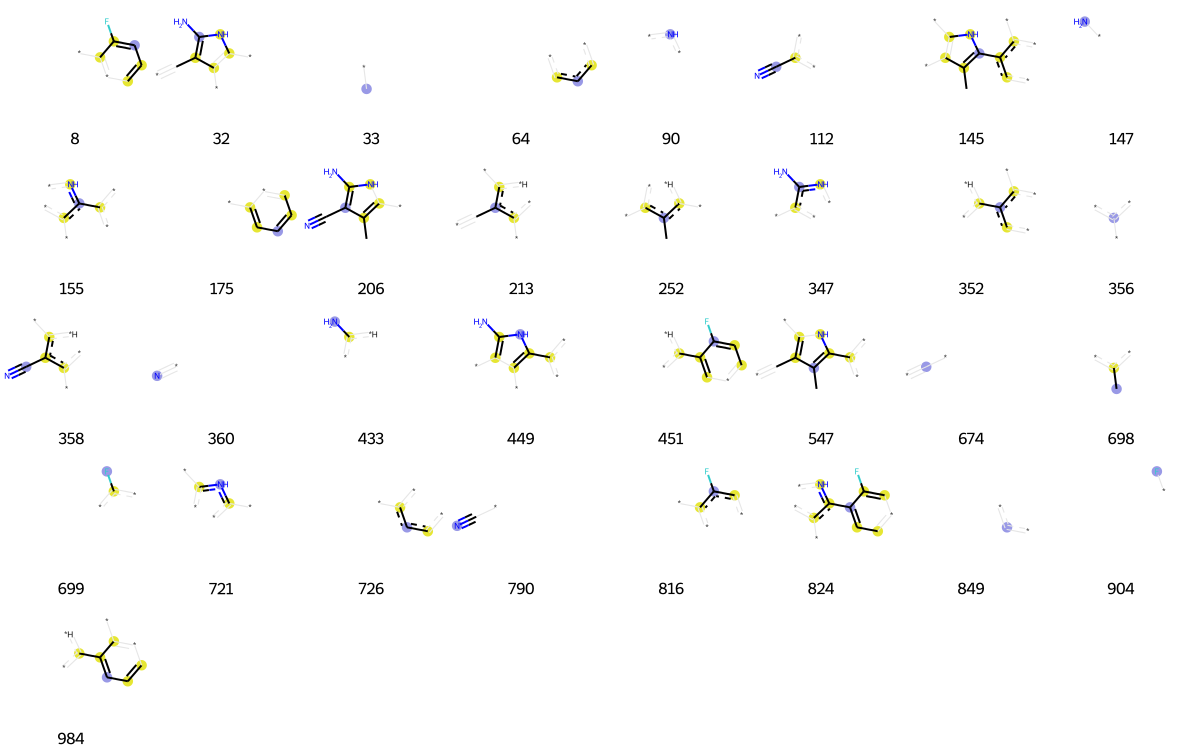

In [2500]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2501]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 31,
 33,
 36,
 80,
 108,
 114,
 128,
 136,
 138,
 146,
 164,
 175,
 201,
 252,
 305,
 319,
 341,
 344,
 350,
 356,
 360,
 392,
 400,
 416,
 429,
 452,
 527,
 571,
 573,
 643,
 650,
 674,
 678,
 692,
 715,
 726,
 736,
 753,
 770,
 790,
 803,
 807,
 825,
 829,
 849,
 893,
 896,
 904,
 913,
 926,
 940,
 979]

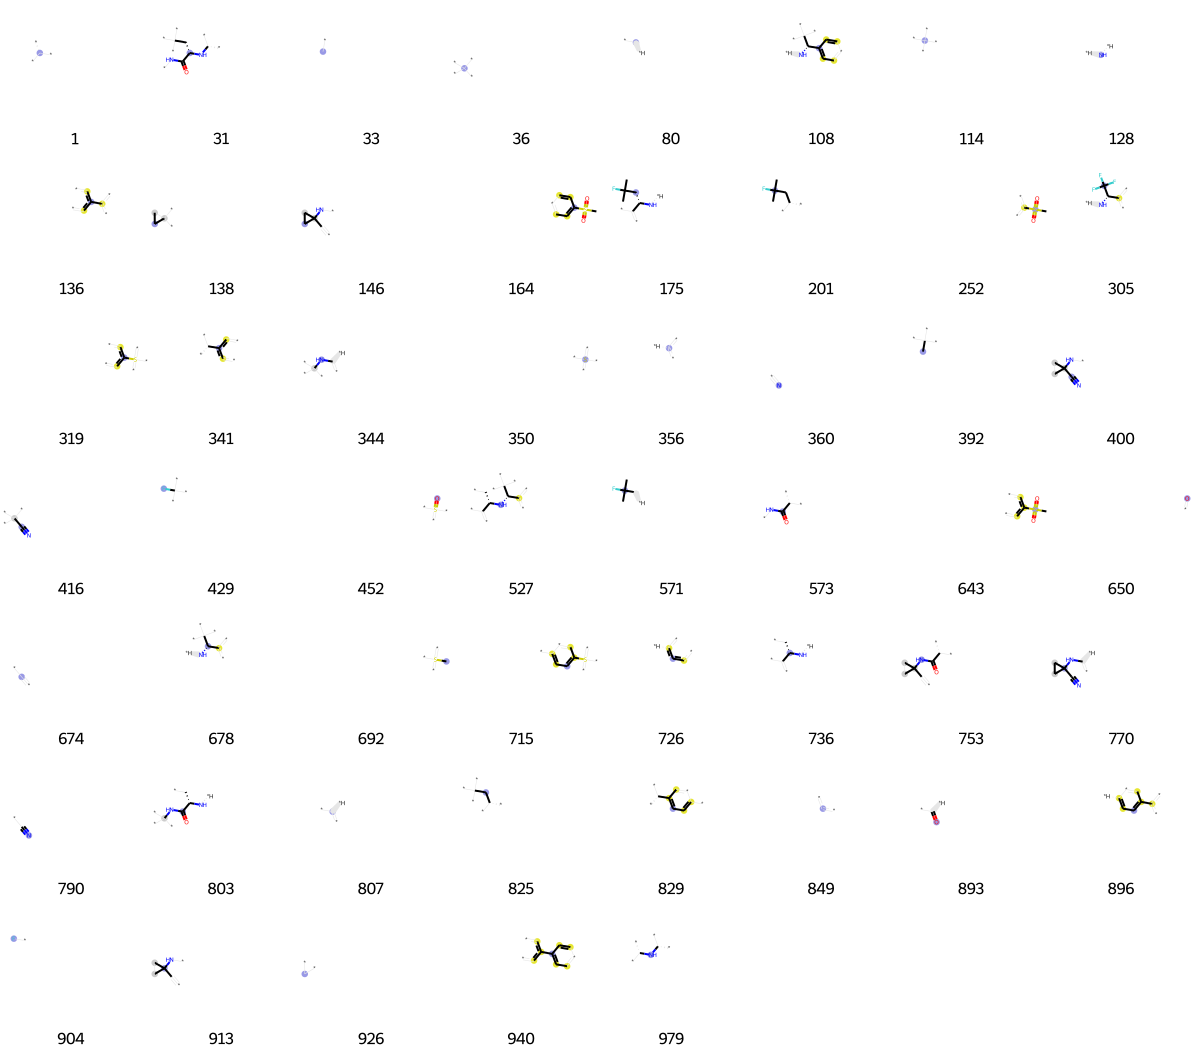

In [2502]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2503]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[54,
 64,
 121,
 136,
 157,
 167,
 175,
 314,
 356,
 389,
 472,
 501,
 578,
 580,
 583,
 630,
 650,
 656,
 666,
 726,
 732,
 736,
 745,
 779,
 784,
 807,
 849,
 865,
 875,
 920,
 960,
 992]

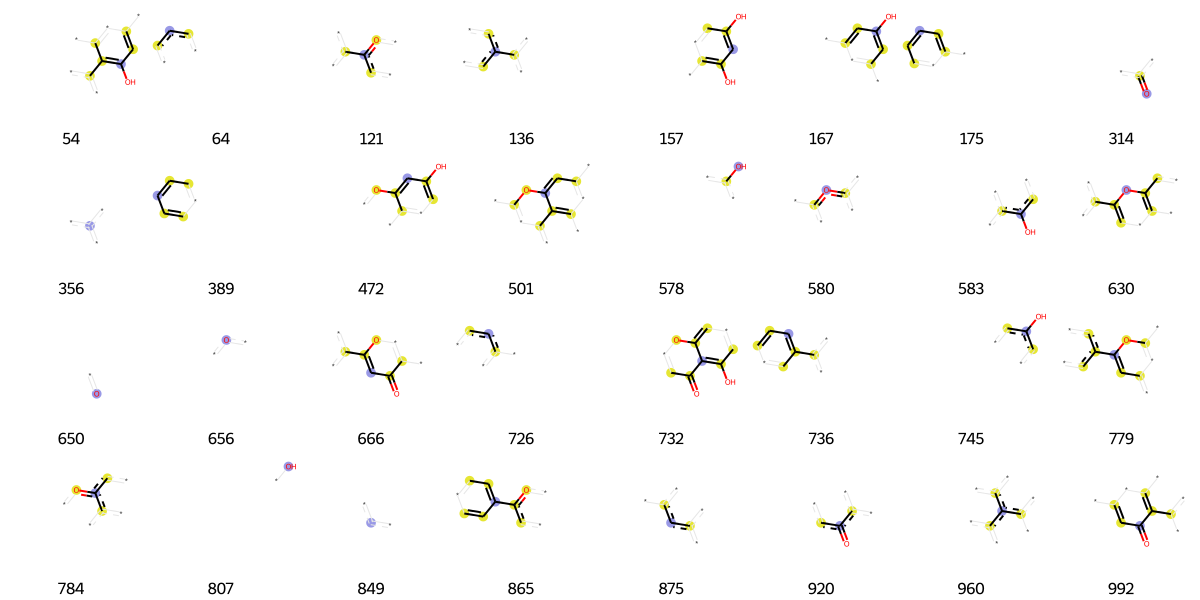

In [2504]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2505]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 80,
 117,
 128,
 171,
 220,
 222,
 227,
 250,
 293,
 318,
 341,
 356,
 375,
 449,
 470,
 482,
 539,
 573,
 650,
 659,
 715,
 726,
 753,
 769,
 785,
 790,
 807,
 824,
 829,
 838,
 849,
 886,
 893,
 914,
 939]

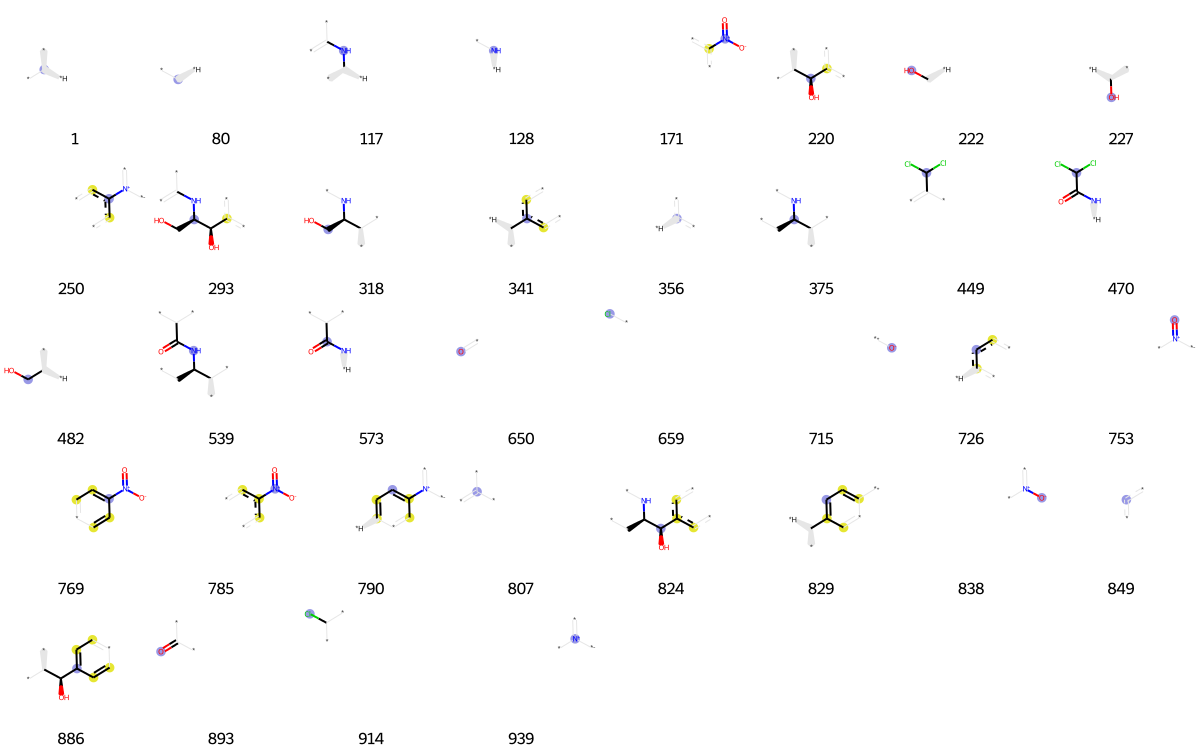

In [2506]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2507]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[0,
 1,
 4,
 11,
 33,
 41,
 42,
 58,
 64,
 79,
 80,
 86,
 108,
 116,
 117,
 128,
 140,
 143,
 144,
 147,
 158,
 173,
 175,
 183,
 188,
 193,
 197,
 242,
 259,
 283,
 301,
 351,
 354,
 356,
 369,
 389,
 394,
 409,
 412,
 416,
 446,
 456,
 458,
 488,
 493,
 531,
 534,
 540,
 545,
 551,
 573,
 592,
 594,
 618,
 624,
 650,
 680,
 689,
 691,
 720,
 725,
 726,
 728,
 730,
 736,
 739,
 759,
 786,
 798,
 807,
 816,
 823,
 825,
 831,
 837,
 849,
 857,
 874,
 875,
 887,
 893,
 902,
 918,
 926,
 927,
 935,
 978,
 980,
 981,
 982,
 992,
 1007,
 1019]

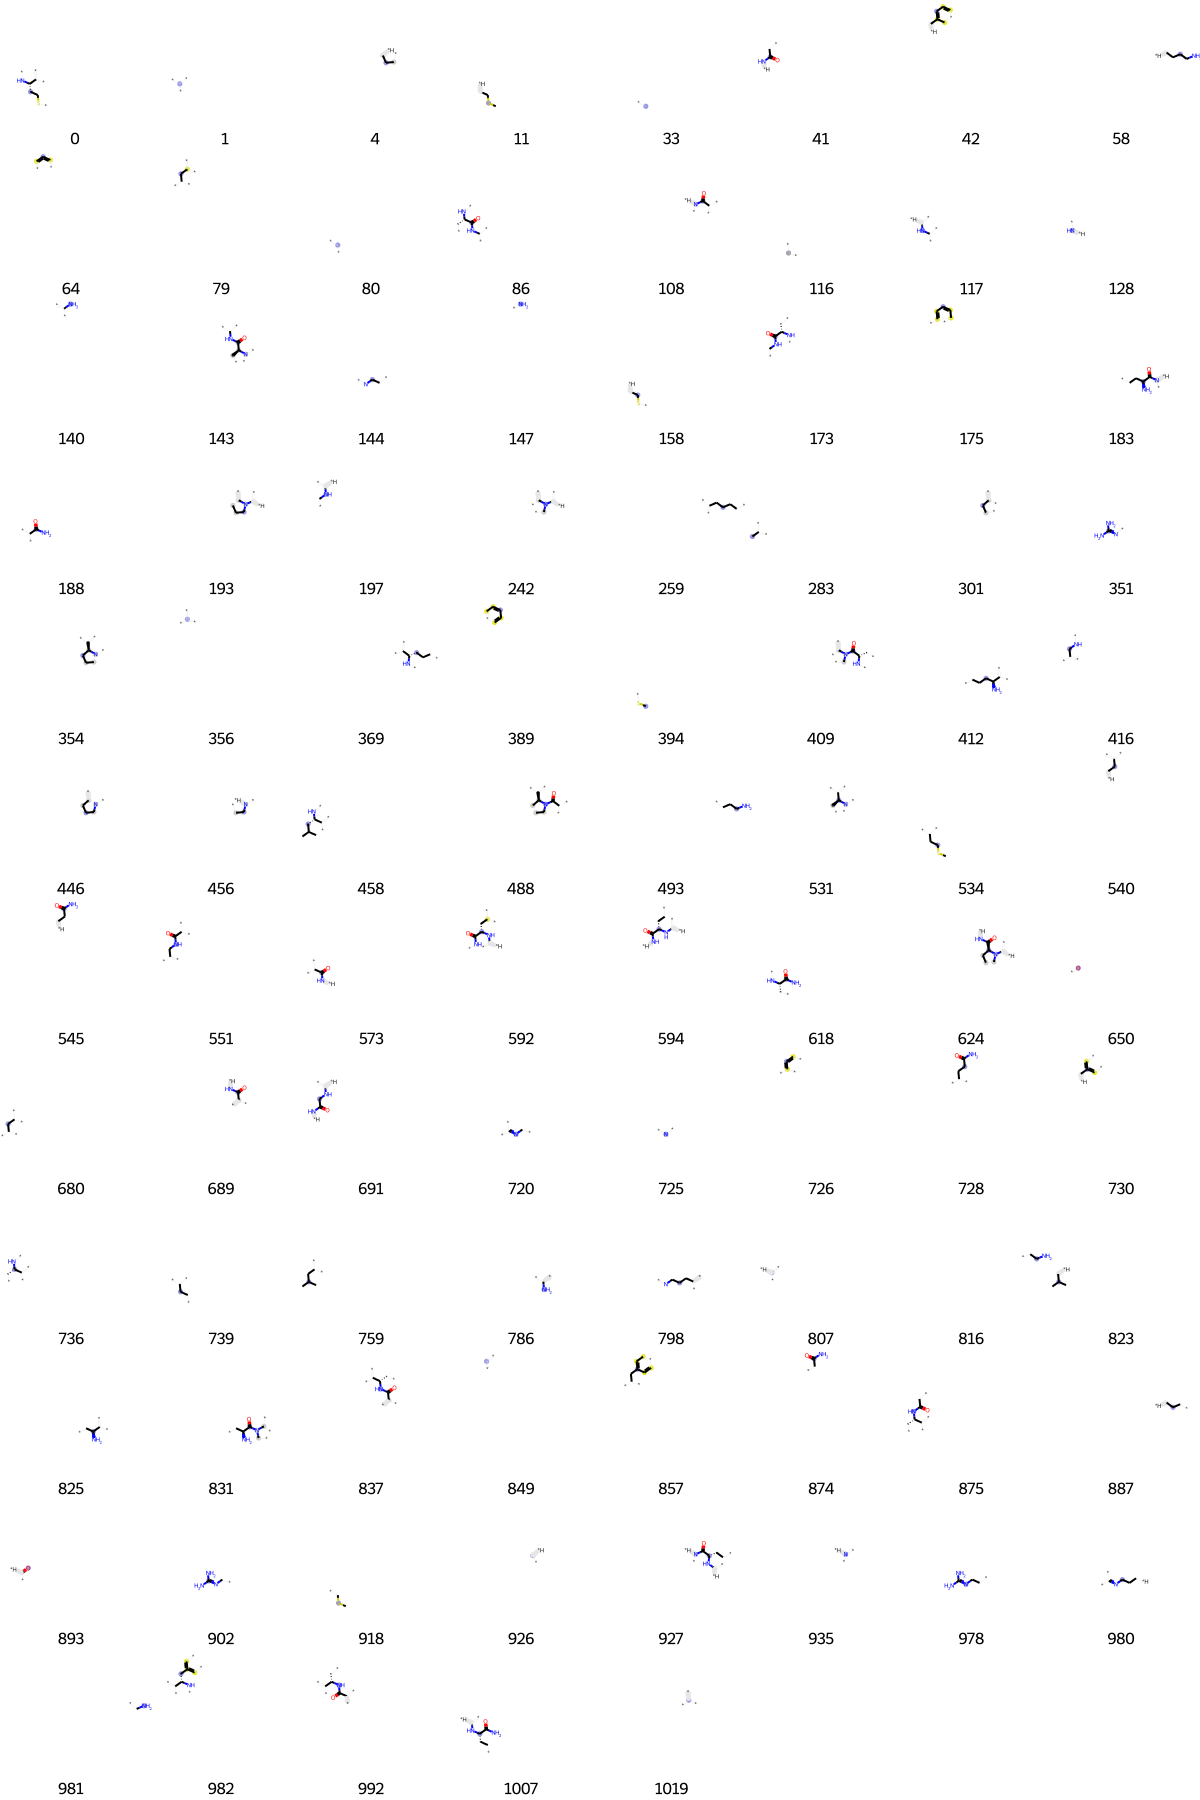

In [2508]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2509]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[25,
 53,
 55,
 64,
 79,
 128,
 159,
 175,
 179,
 186,
 191,
 315,
 356,
 360,
 389,
 451,
 499,
 556,
 578,
 583,
 589,
 650,
 674,
 694,
 703,
 711,
 722,
 726,
 790,
 792,
 803,
 807,
 849,
 875,
 893,
 945,
 1009]

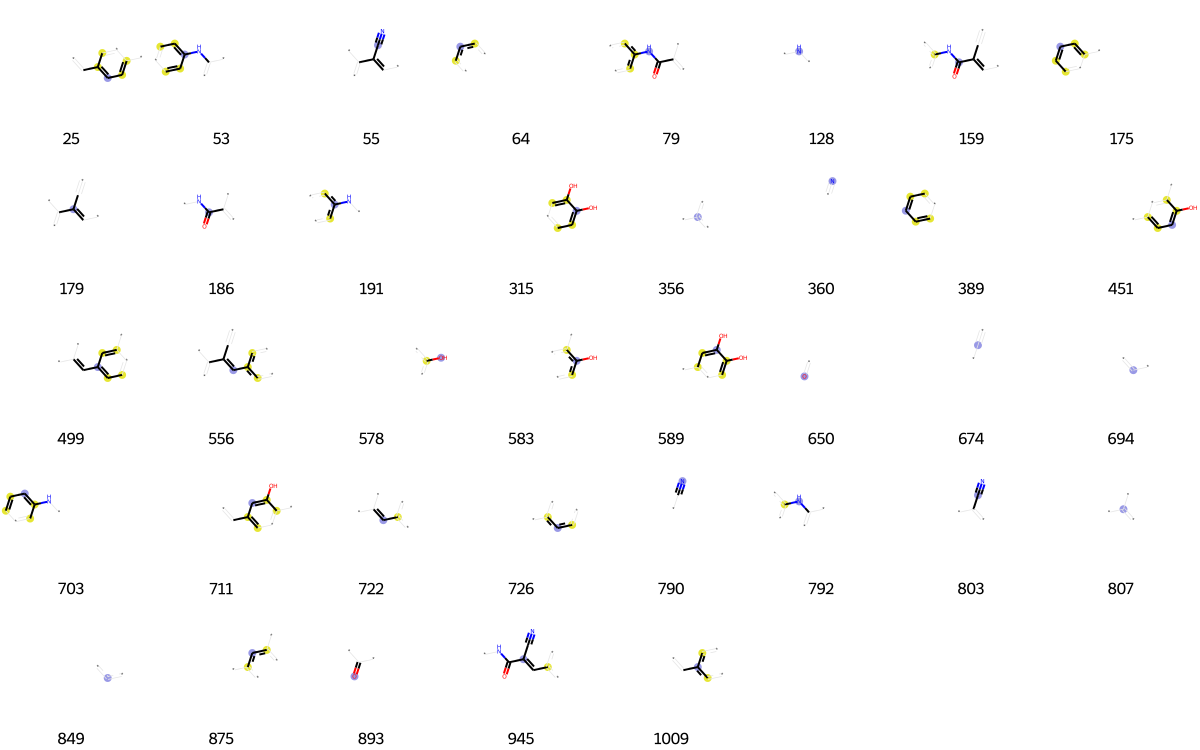

In [2510]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2511]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 46,
 65,
 71,
 75,
 80,
 128,
 143,
 151,
 152,
 167,
 194,
 208,
 210,
 222,
 233,
 247,
 282,
 294,
 356,
 378,
 406,
 413,
 428,
 430,
 454,
 463,
 474,
 492,
 519,
 577,
 591,
 610,
 656,
 672,
 674,
 687,
 700,
 707,
 708,
 740,
 794,
 807,
 815,
 820,
 831,
 849,
 887,
 897,
 932,
 935,
 1019,
 1022]

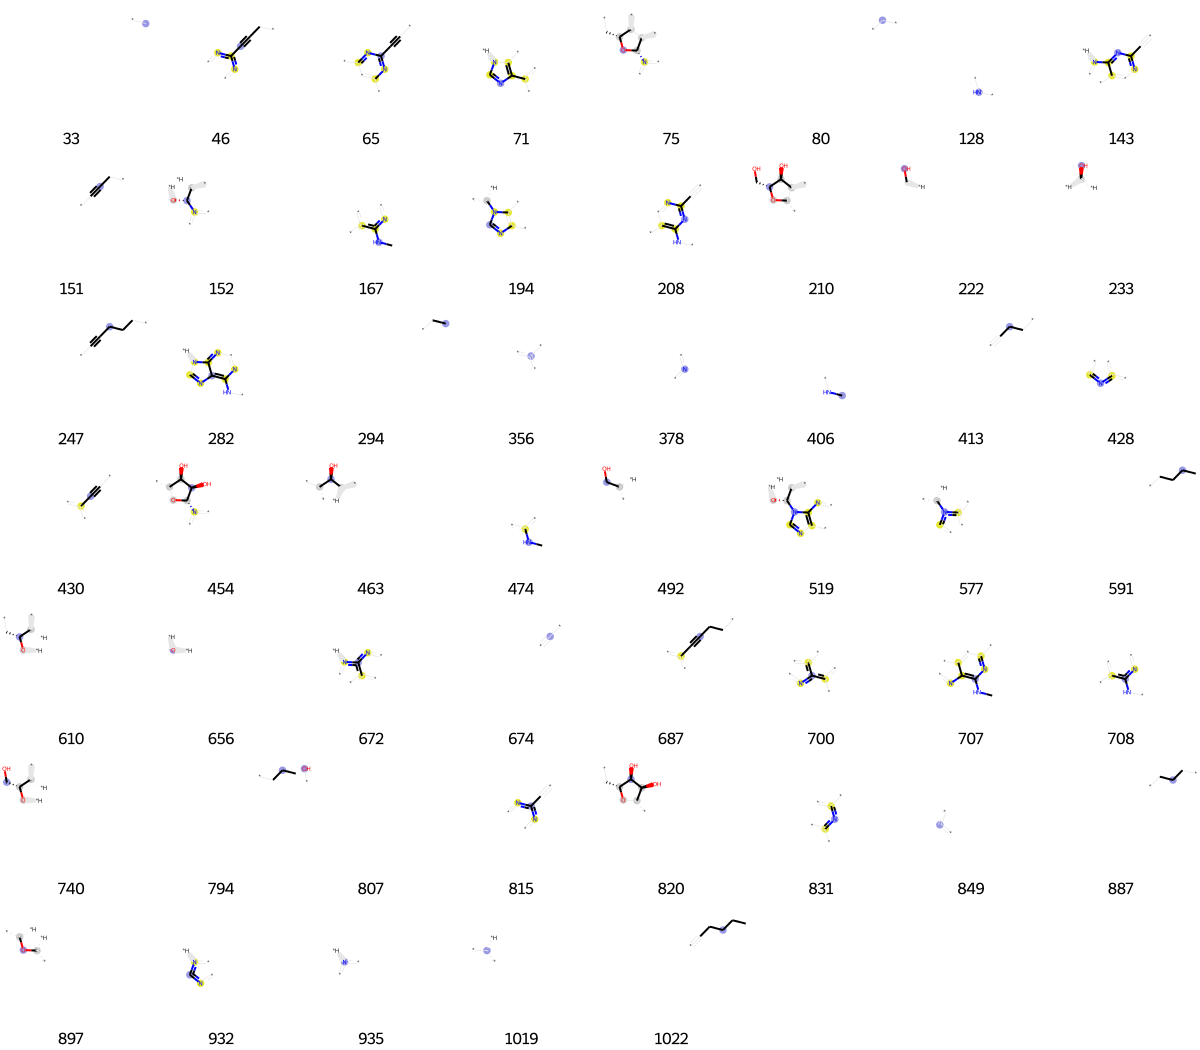

In [2512]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2513]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 79,
 80,
 147,
 193,
 197,
 310,
 315,
 356,
 389,
 403,
 451,
 578,
 583,
 589,
 650,
 726,
 730,
 786,
 807,
 820,
 825,
 849,
 875,
 893,
 966,
 1017]

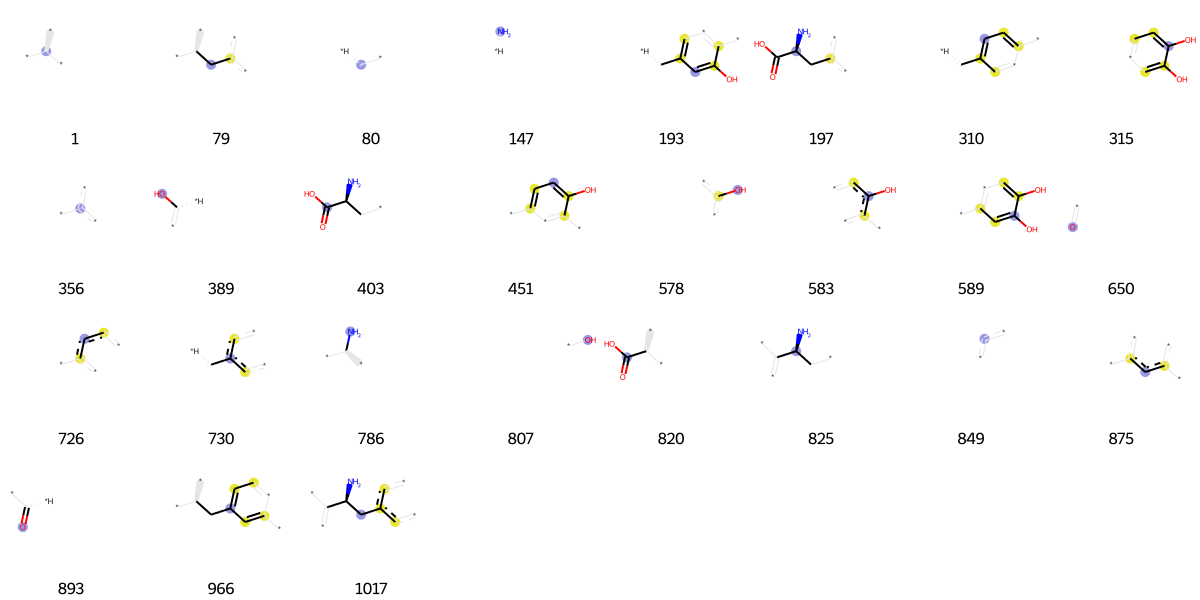

In [2514]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2515]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[9,
 13,
 15,
 25,
 33,
 52,
 64,
 65,
 80,
 94,
 105,
 114,
 212,
 219,
 225,
 263,
 287,
 322,
 325,
 332,
 356,
 361,
 363,
 389,
 401,
 416,
 428,
 456,
 494,
 512,
 540,
 569,
 594,
 650,
 673,
 694,
 695,
 713,
 718,
 726,
 775,
 781,
 807,
 831,
 835,
 841,
 849,
 857,
 874,
 875,
 878,
 887,
 893,
 946,
 961,
 1009]

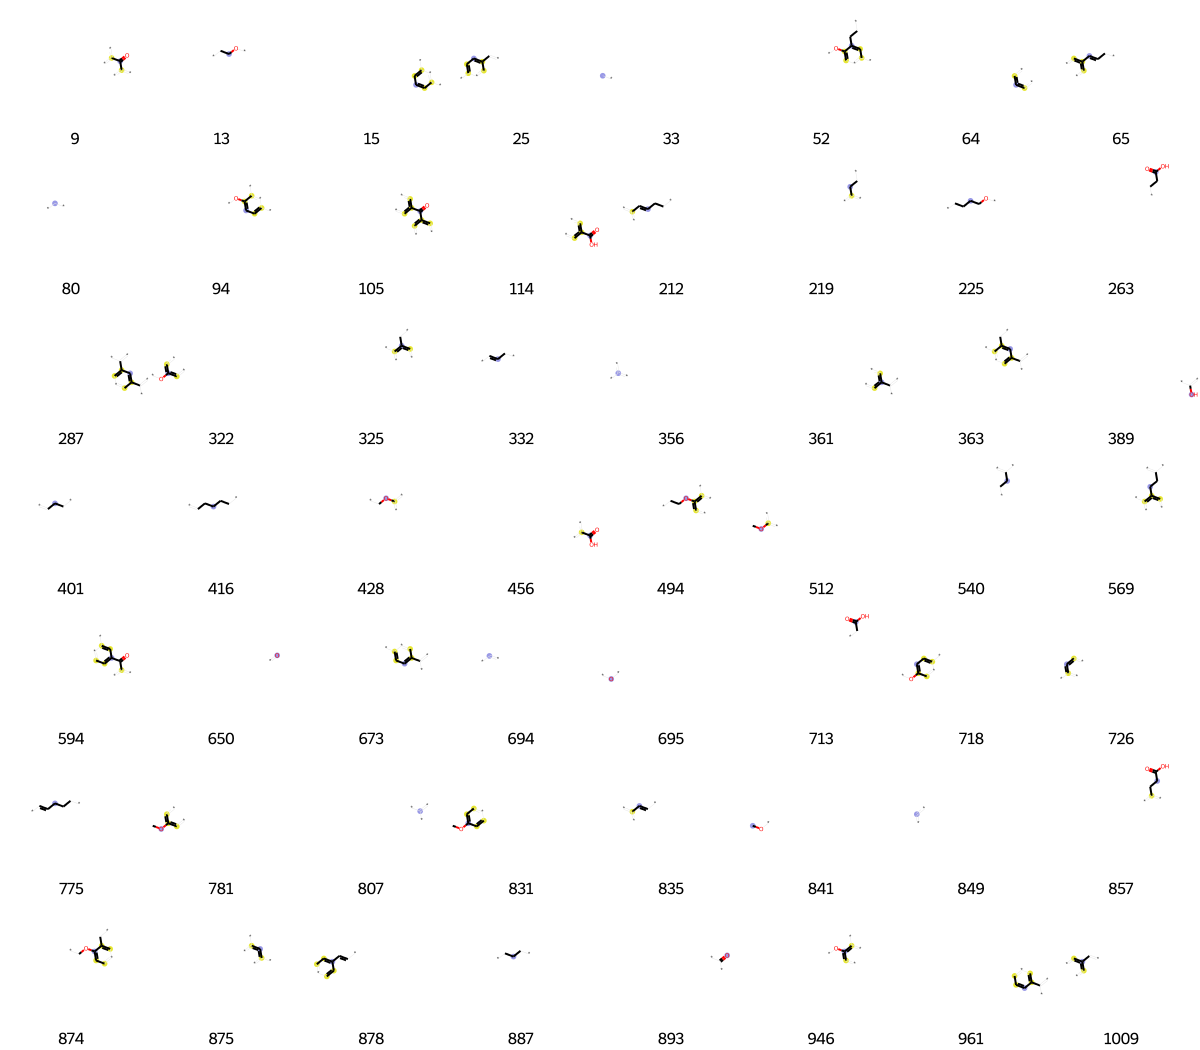

In [2516]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2517]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 73,
 90,
 139,
 140,
 147,
 179,
 236,
 309,
 345,
 353,
 356,
 378,
 428,
 481,
 490,
 589,
 601,
 650,
 677,
 713,
 725,
 806,
 807,
 834,
 849,
 870,
 881,
 893,
 931,
 1002]

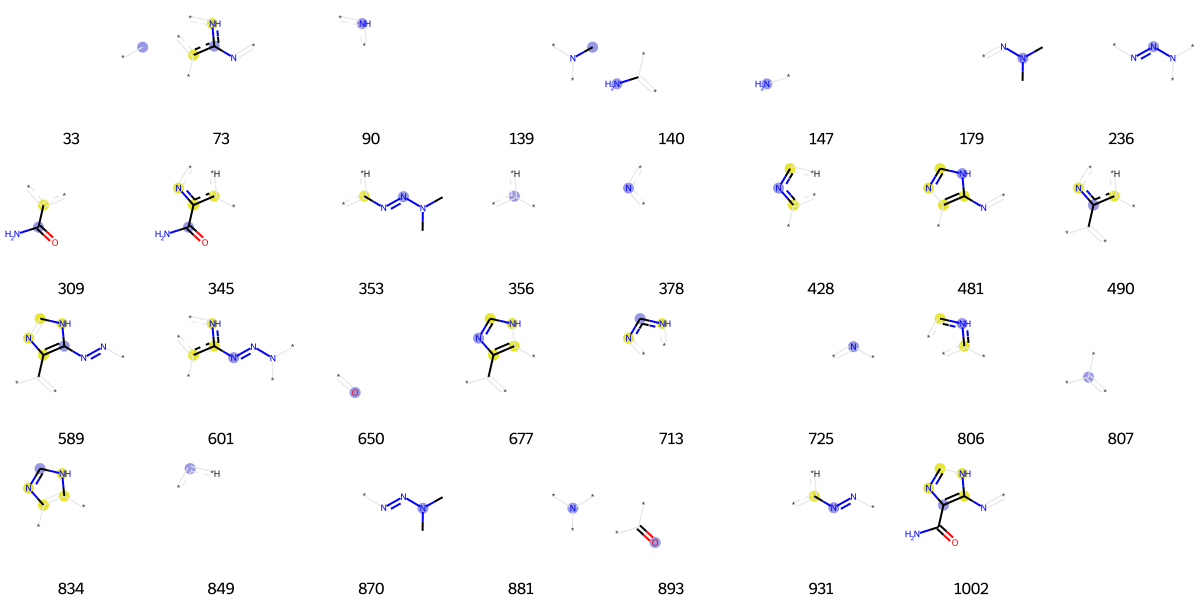

In [2518]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2519]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 42,
 62,
 64,
 83,
 90,
 119,
 128,
 172,
 175,
 233,
 259,
 268,
 275,
 288,
 301,
 325,
 333,
 335,
 356,
 361,
 456,
 476,
 500,
 514,
 534,
 549,
 585,
 622,
 650,
 677,
 695,
 714,
 721,
 726,
 739,
 740,
 759,
 791,
 807,
 829,
 830,
 841,
 849,
 893,
 922,
 926,
 935,
 950,
 956,
 978,
 1019,
 1023]

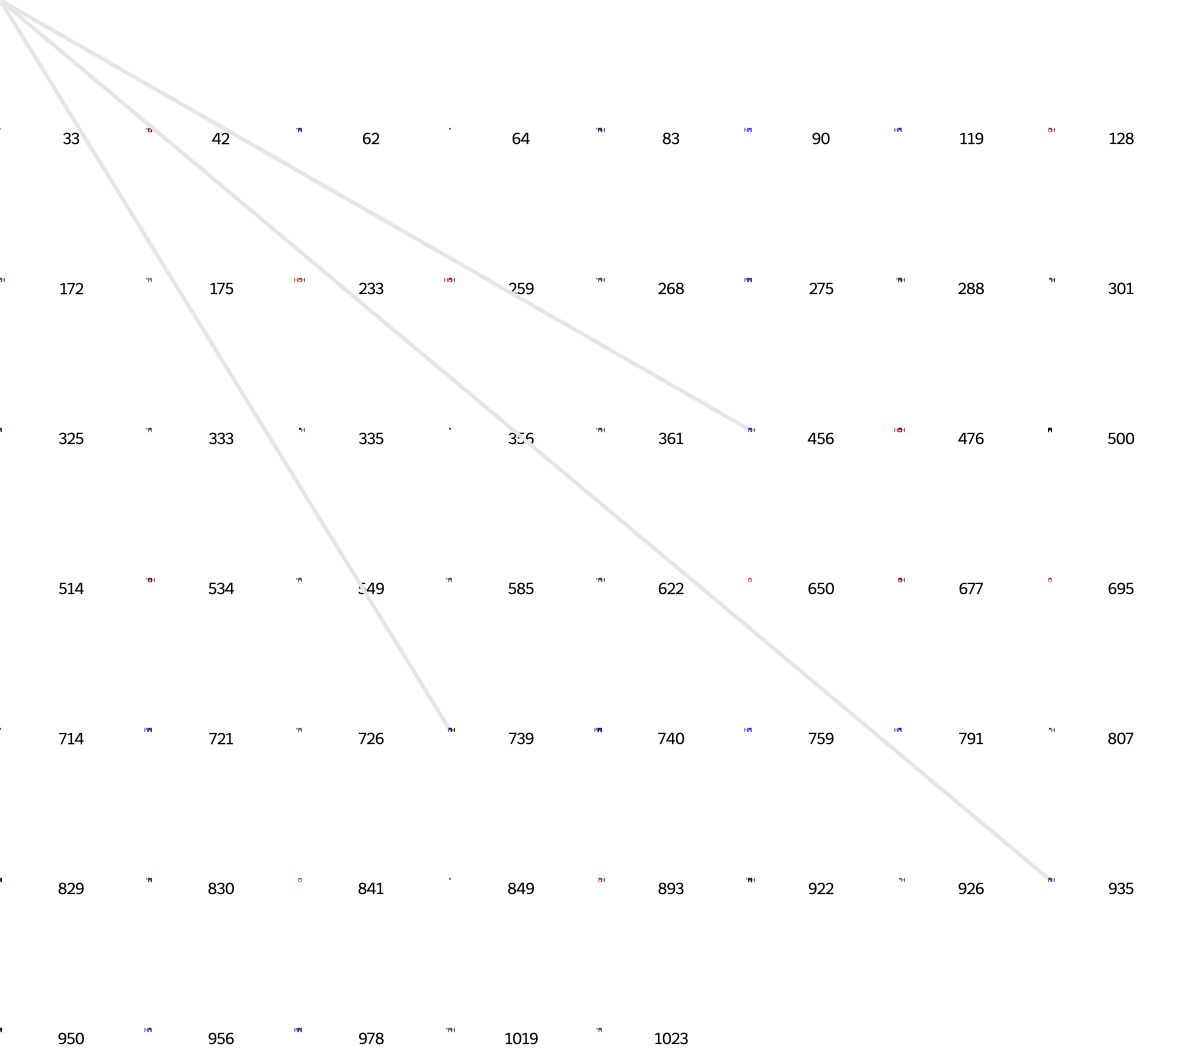

In [2520]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2521]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[13,
 33,
 45,
 80,
 119,
 222,
 225,
 294,
 301,
 345,
 420,
 473,
 591,
 625,
 691,
 695,
 794,
 807,
 887,
 968]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


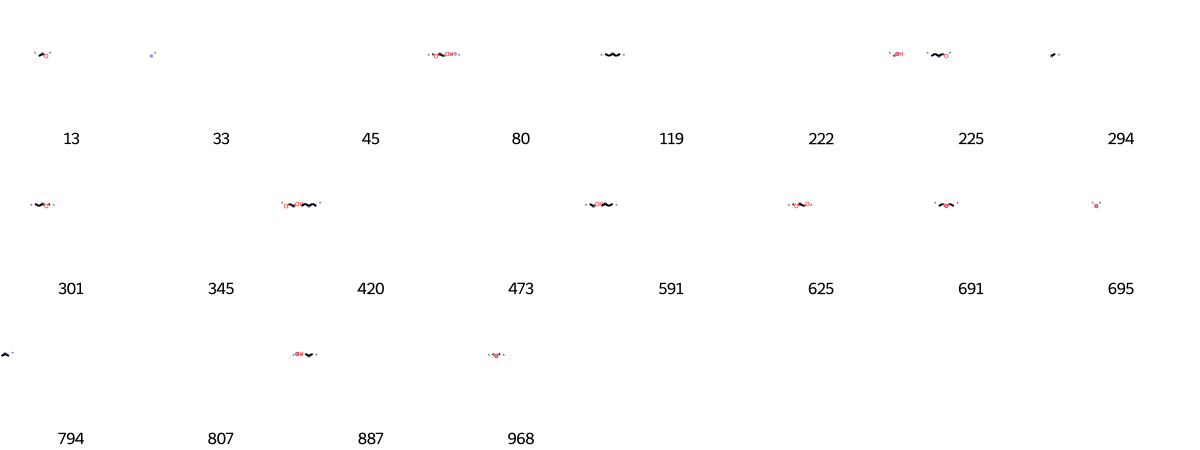

In [2522]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2523]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 80,
 216,
 222,
 227,
 377,
 387,
 389,
 411,
 482,
 574,
 650,
 657,
 807,
 820,
 829,
 831,
 876,
 888,
 893]

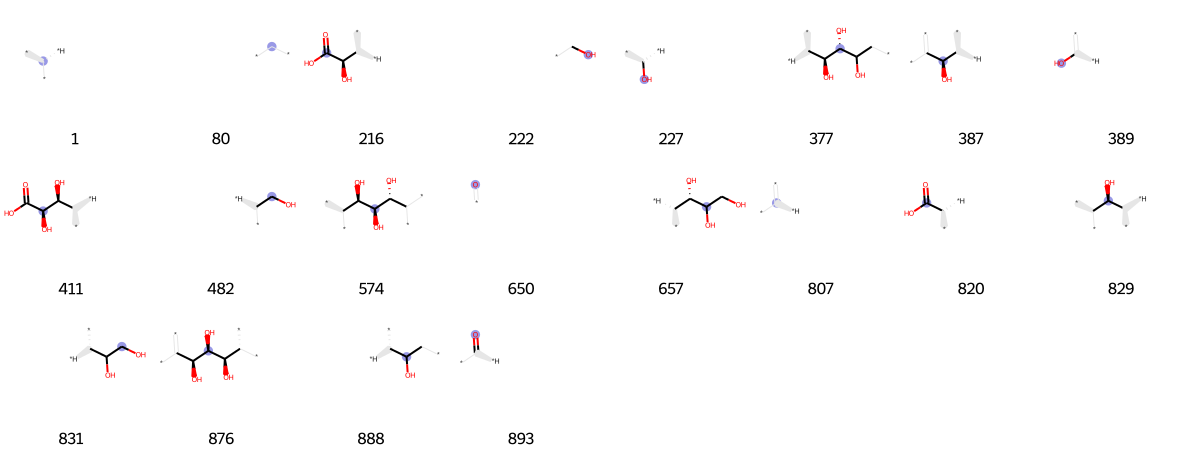

In [2524]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2525]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[15,
 64,
 136,
 147,
 151,
 217,
 266,
 323,
 346,
 352,
 356,
 365,
 378,
 379,
 381,
 407,
 417,
 428,
 433,
 435,
 456,
 463,
 485,
 489,
 511,
 523,
 527,
 537,
 548,
 600,
 607,
 635,
 650,
 656,
 726,
 728,
 736,
 766,
 786,
 827,
 831,
 849,
 875,
 896,
 909,
 916,
 926,
 935,
 950,
 960,
 980,
 1014]

In [2526]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[13,
 25,
 31,
 33,
 49,
 53,
 73,
 80,
 102,
 104,
 158,
 170,
 176,
 193,
 219,
 222,
 233,
 284,
 285,
 295,
 299,
 310,
 315,
 356,
 357,
 451,
 463,
 489,
 492,
 550,
 578,
 583,
 589,
 610,
 622,
 650,
 656,
 694,
 695,
 711,
 722,
 726,
 730,
 735,
 740,
 772,
 781,
 782,
 807,
 823,
 835,
 849,
 869,
 875,
 893,
 897,
 926,
 953,
 956,
 999,
 1009,
 1010,
 1017,
 1019]

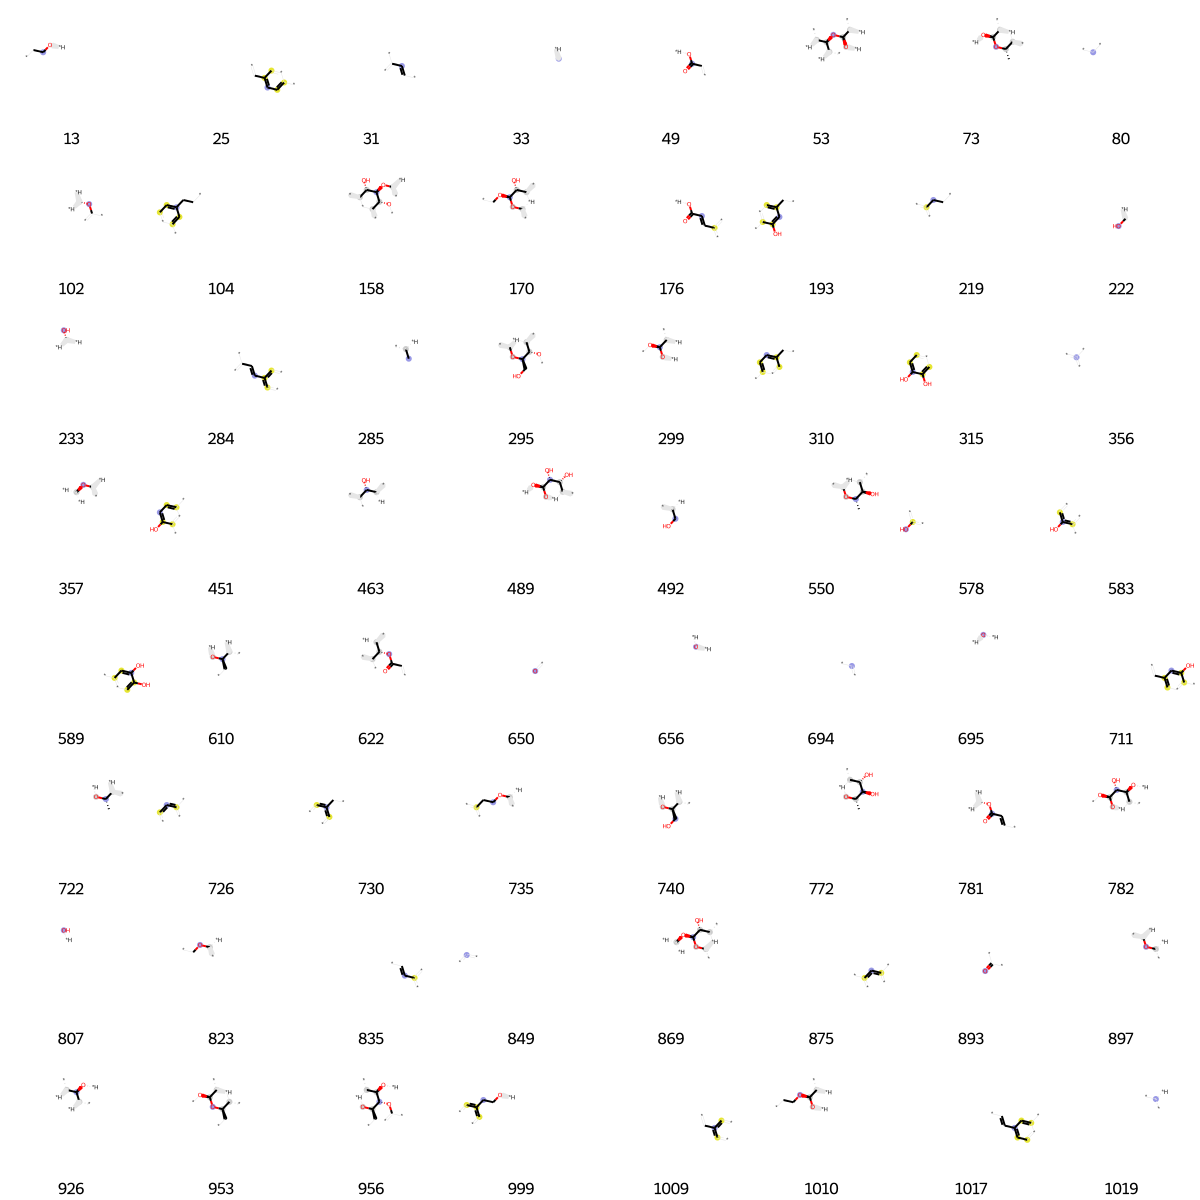

In [2527]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2528]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[53,
 80,
 84,
 147,
 158,
 191,
 210,
 222,
 226,
 233,
 238,
 254,
 268,
 295,
 299,
 350,
 357,
 390,
 452,
 463,
 466,
 488,
 492,
 533,
 545,
 592,
 610,
 650,
 656,
 695,
 740,
 782,
 807,
 808,
 820,
 838,
 839,
 869,
 882,
 895,
 897,
 926,
 952,
 953,
 981,
 1019]

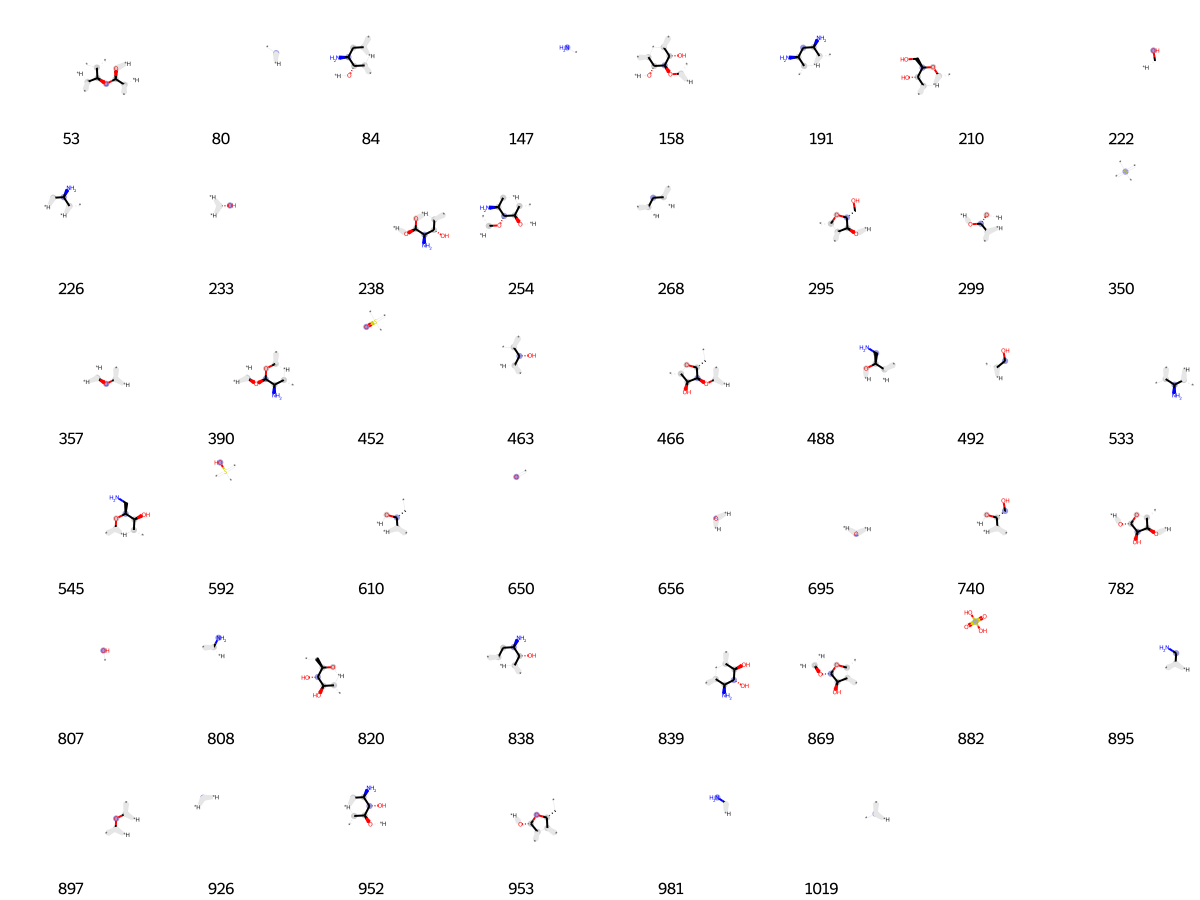

In [2529]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2530]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[36,
 64,
 77,
 114,
 175,
 219,
 262,
 271,
 356,
 378,
 396,
 419,
 429,
 579,
 623,
 630,
 726,
 762,
 809,
 842,
 843,
 848,
 849,
 855,
 904,
 915,
 932,
 935]

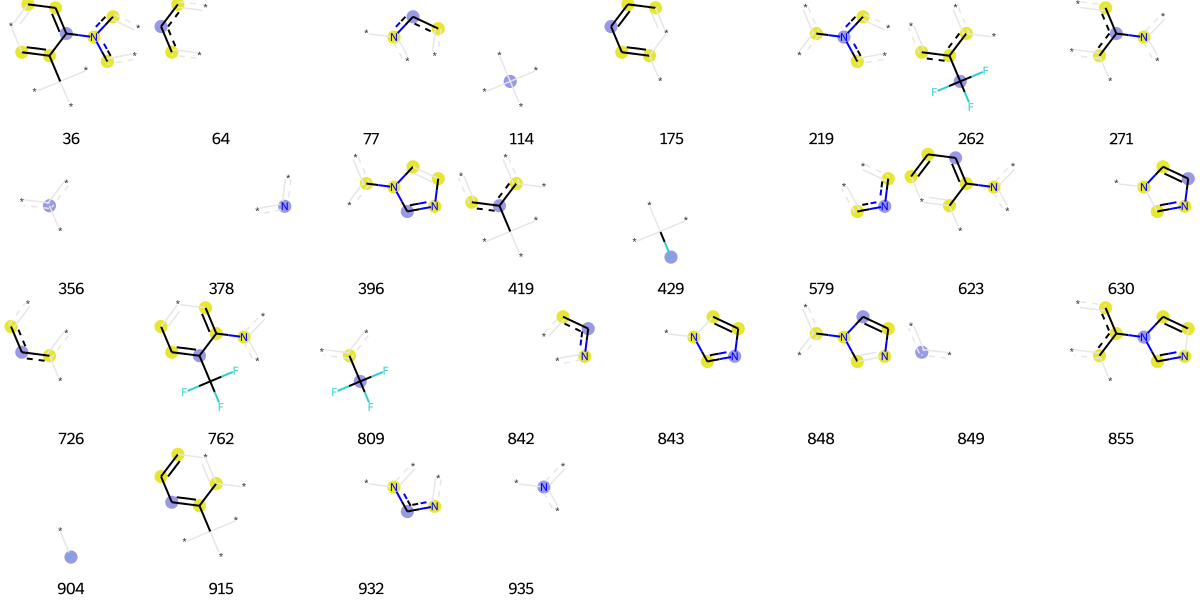

In [2531]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2532]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 14,
 17,
 33,
 36,
 64,
 73,
 74,
 80,
 90,
 102,
 117,
 124,
 128,
 131,
 139,
 171,
 175,
 207,
 214,
 218,
 250,
 291,
 300,
 339,
 341,
 344,
 348,
 356,
 361,
 378,
 389,
 441,
 447,
 491,
 541,
 543,
 554,
 557,
 568,
 583,
 616,
 650,
 652,
 675,
 698,
 708,
 726,
 731,
 738,
 751,
 807,
 825,
 831,
 836,
 844,
 849,
 859,
 875,
 881,
 893,
 922,
 926,
 935,
 941,
 943,
 980,
 1001,
 1008]

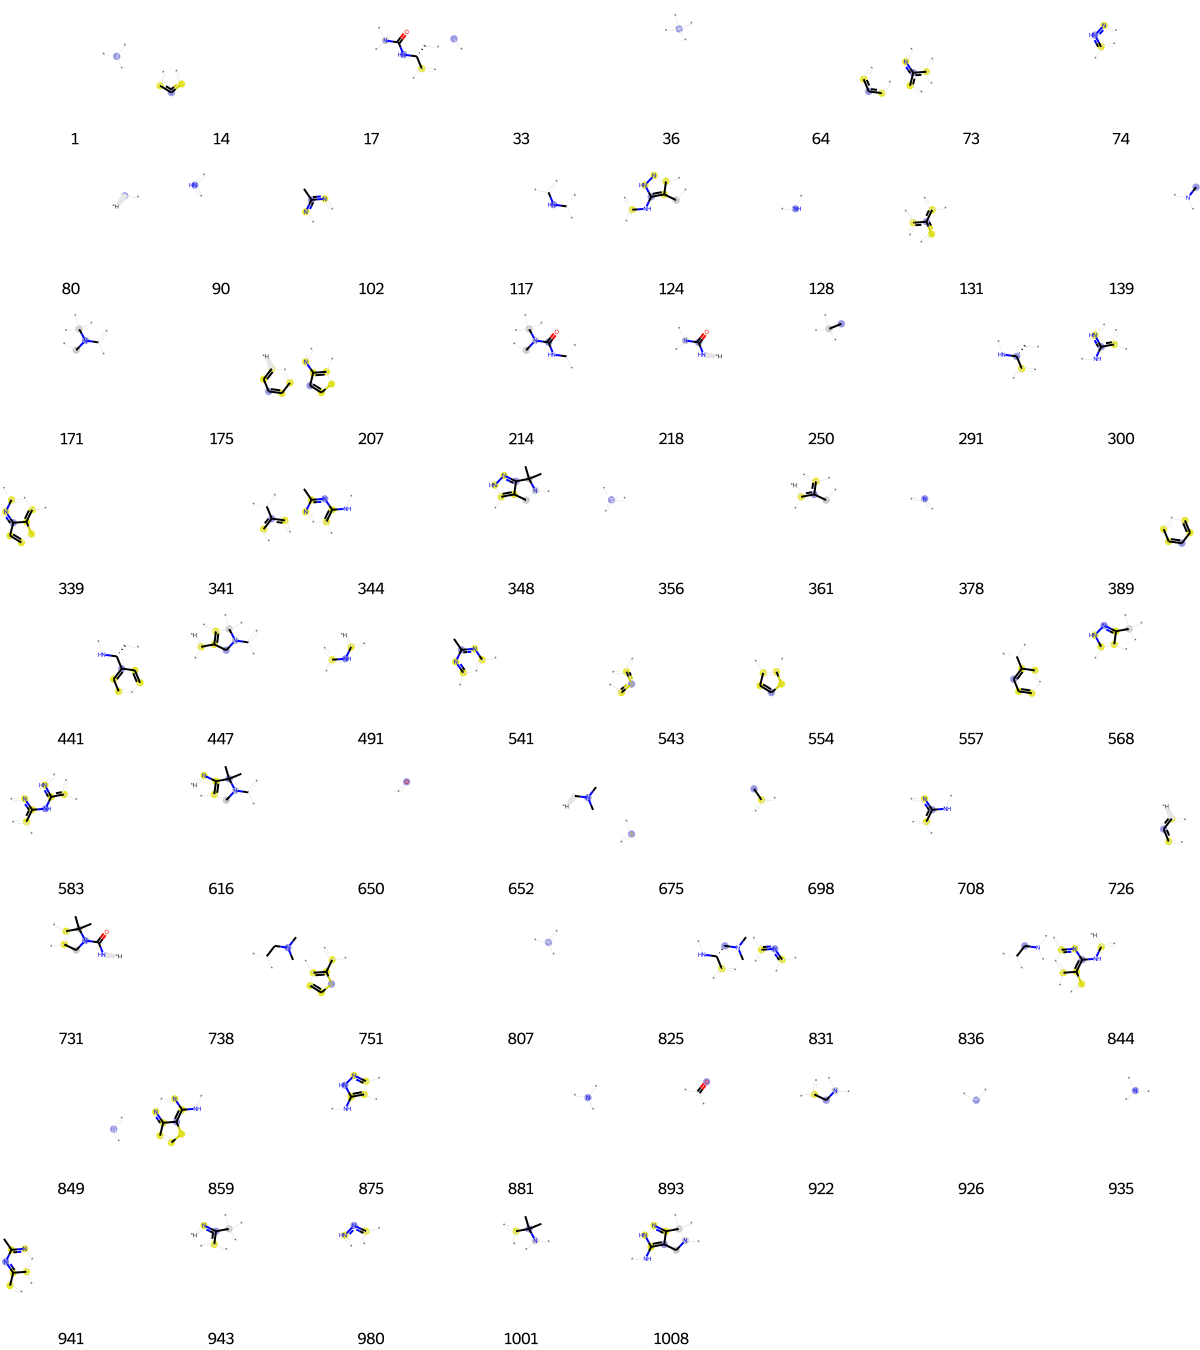

In [2533]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2534]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[34,
 62,
 72,
 80,
 102,
 112,
 123,
 133,
 281,
 298,
 305,
 310,
 356,
 360,
 378,
 409,
 414,
 507,
 607,
 625,
 674,
 712,
 726,
 728,
 730,
 765,
 790,
 849,
 881,
 909,
 930,
 932,
 935,
 944,
 960,
 977]

In [2535]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[15,
 41,
 42,
 64,
 74,
 80,
 156,
 171,
 175,
 193,
 228,
 250,
 322,
 346,
 356,
 389,
 422,
 456,
 559,
 562,
 565,
 576,
 593,
 650,
 695,
 705,
 715,
 718,
 726,
 730,
 741,
 744,
 747,
 753,
 767,
 769,
 784,
 785,
 790,
 807,
 838,
 849,
 875,
 893,
 899,
 926,
 935,
 939,
 985]

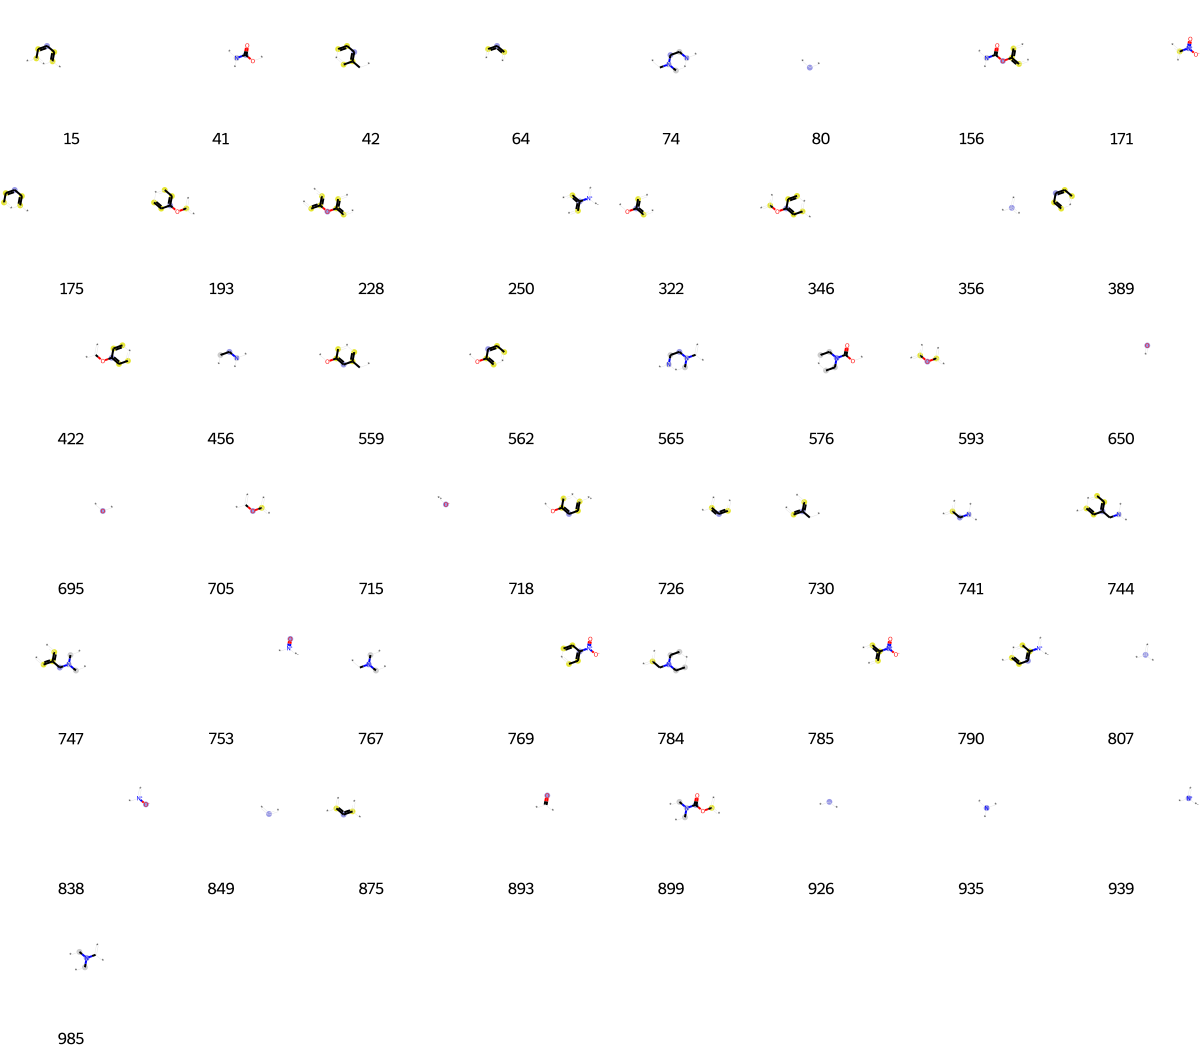

In [2536]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2537]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[69,
 80,
 90,
 144,
 147,
 183,
 219,
 281,
 356,
 378,
 482,
 514,
 695,
 724,
 726,
 803,
 816,
 823,
 849,
 953,
 980,
 981]

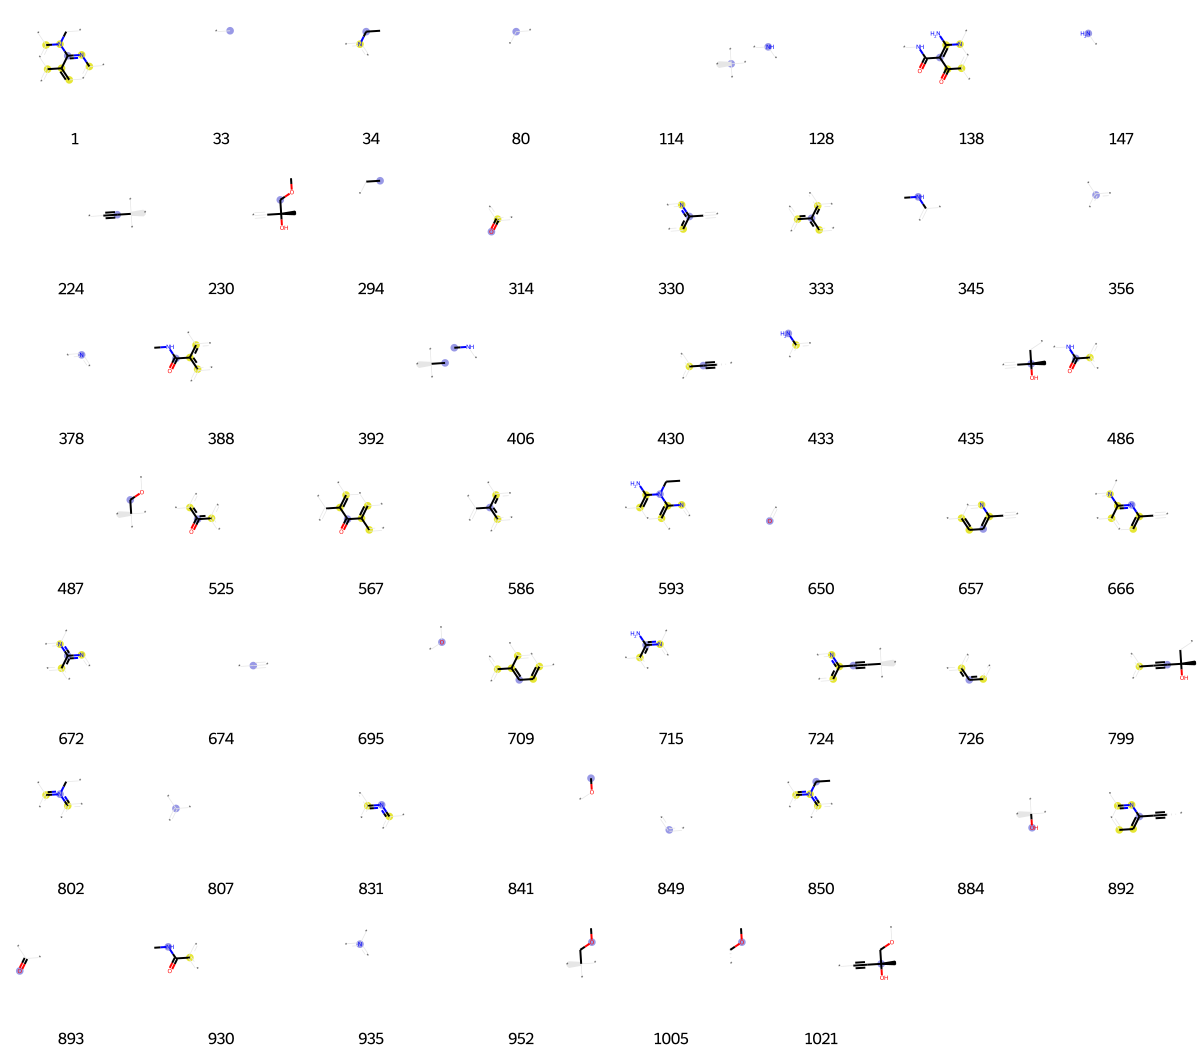

In [2538]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2539]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[5,
 19,
 23,
 33,
 42,
 64,
 80,
 128,
 136,
 150,
 155,
 197,
 235,
 245,
 255,
 265,
 319,
 350,
 356,
 361,
 378,
 400,
 437,
 452,
 486,
 511,
 549,
 562,
 579,
 580,
 641,
 645,
 650,
 656,
 673,
 698,
 715,
 720,
 726,
 730,
 733,
 777,
 791,
 799,
 807,
 813,
 819,
 831,
 835,
 842,
 849,
 873,
 893,
 894,
 896]

In [2540]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33, 34, 80, 97, 110, 189, 294, 342, 636, 696, 807, 849, 881, 932, 978, 1008]

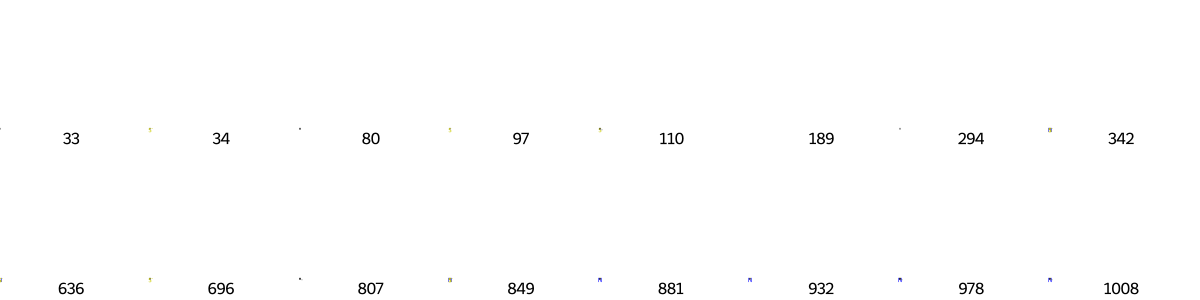

In [2541]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2542]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[13,
 24,
 33,
 35,
 80,
 97,
 179,
 188,
 192,
 193,
 214,
 252,
 293,
 294,
 305,
 314,
 322,
 333,
 356,
 406,
 444,
 561,
 580,
 597,
 650,
 656,
 659,
 673,
 679,
 692,
 695,
 698,
 705,
 709,
 718,
 726,
 779,
 784,
 849,
 875,
 1000,
 1011]

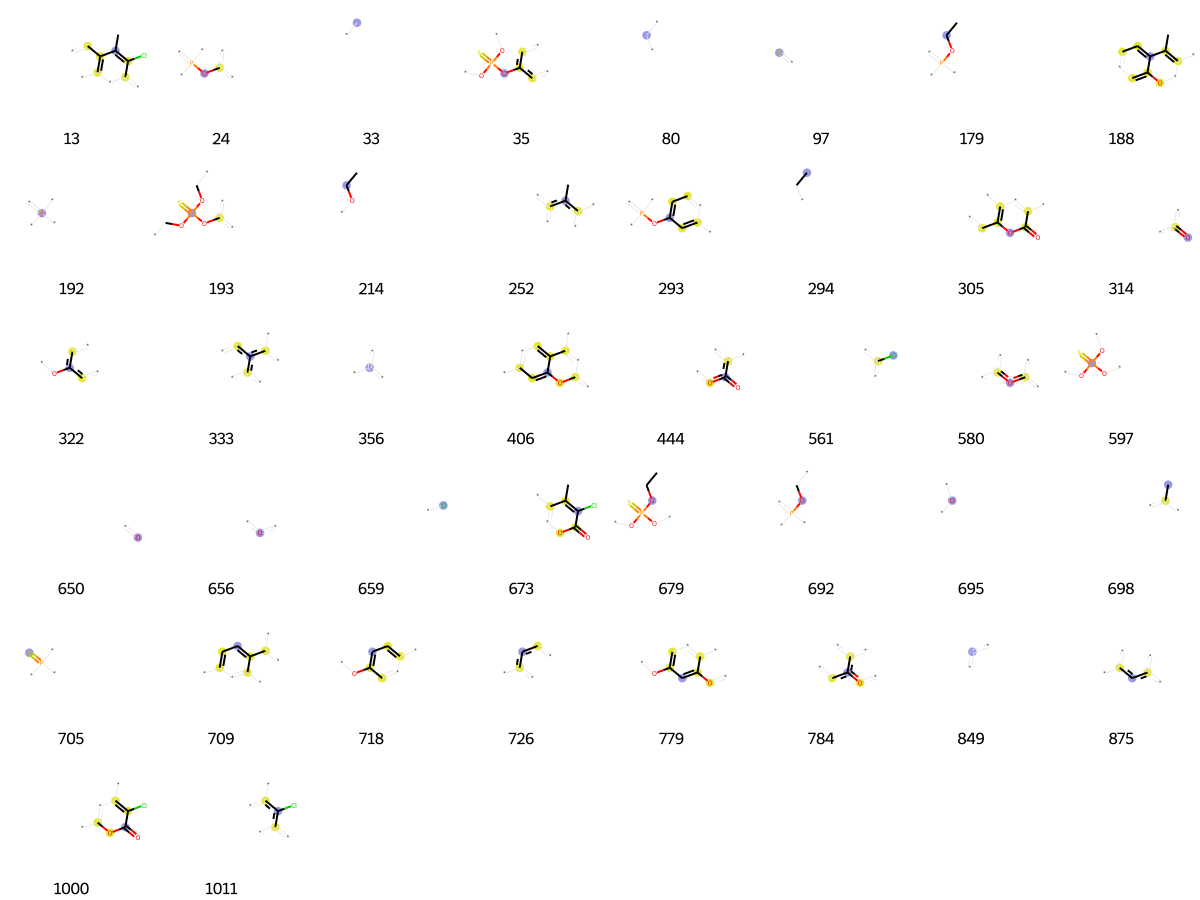

In [2543]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2544]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 106,
 112,
 121,
 123,
 356,
 378,
 385,
 416,
 428,
 446,
 463,
 493,
 578,
 596,
 600,
 604,
 756,
 807,
 831,
 845,
 849,
 904,
 932,
 935]

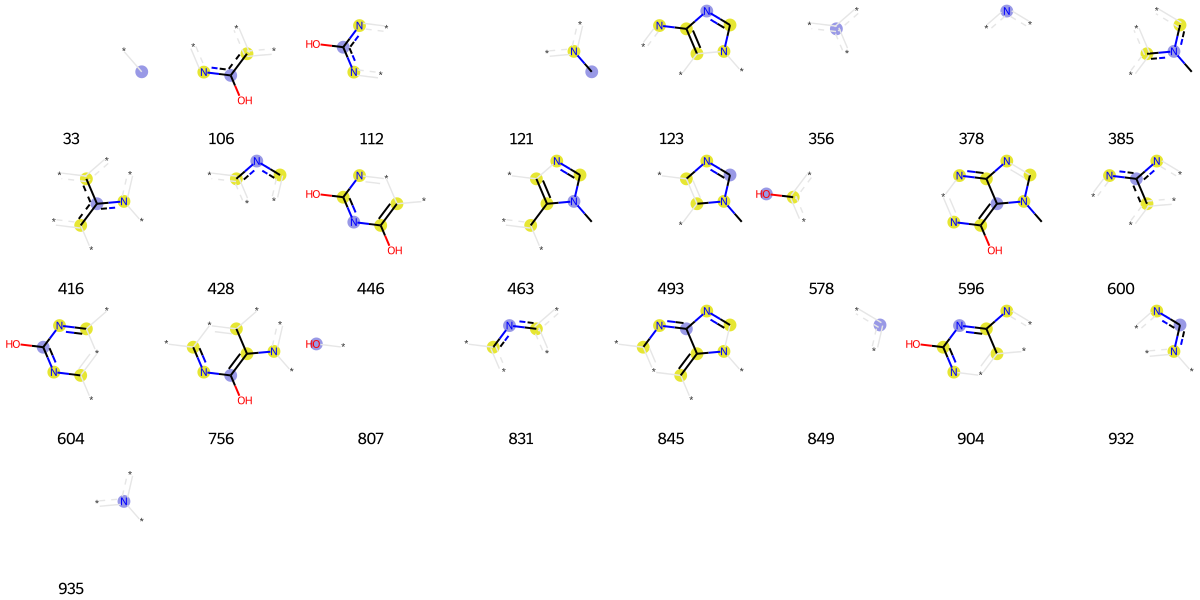

In [2545]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2546]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 8,
 33,
 35,
 36,
 88,
 130,
 253,
 283,
 285,
 301,
 342,
 356,
 367,
 398,
 436,
 452,
 548,
 574,
 576,
 605,
 630,
 656,
 667,
 678,
 679,
 691,
 692,
 706,
 807,
 833,
 926,
 940,
 1002,
 1019]

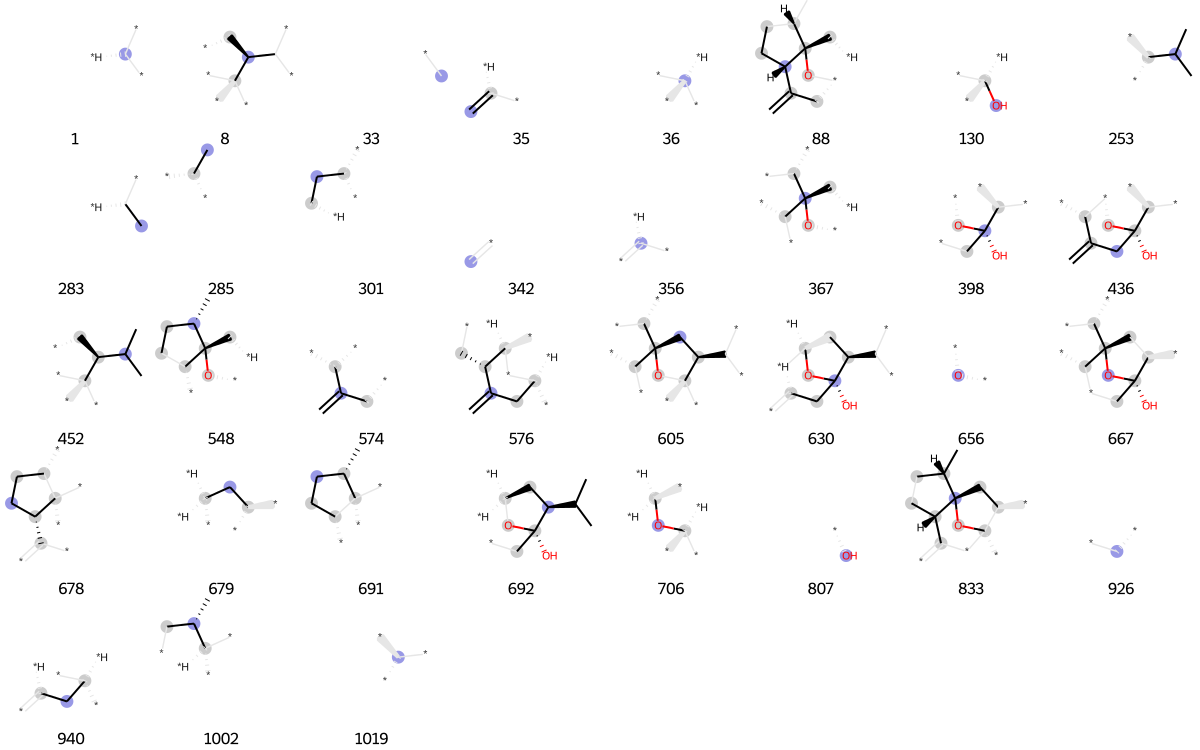

In [2547]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2548]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[45,
 67,
 123,
 128,
 145,
 162,
 165,
 185,
 216,
 295,
 307,
 350,
 356,
 366,
 435,
 437,
 452,
 486,
 497,
 502,
 503,
 537,
 561,
 599,
 607,
 650,
 659,
 675,
 701,
 726,
 728,
 804,
 807,
 816,
 849,
 875,
 893,
 967]

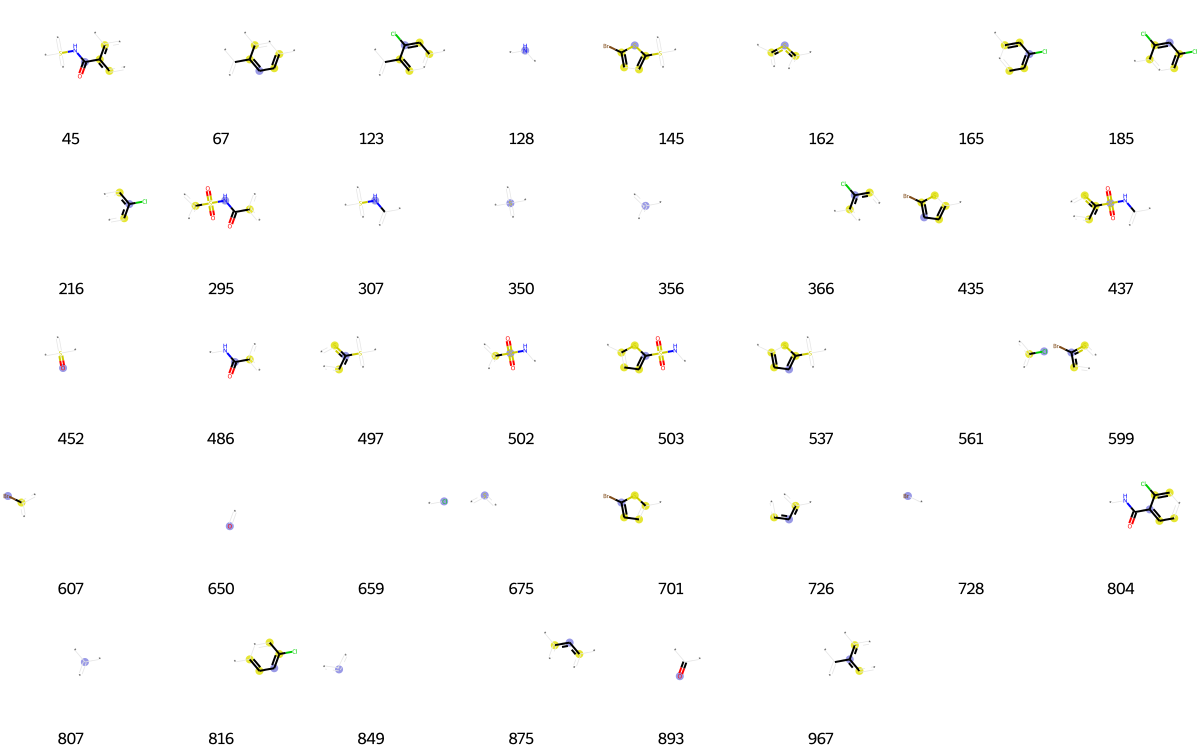

In [2549]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2550]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[8,
 33,
 36,
 74,
 80,
 90,
 96,
 107,
 128,
 142,
 197,
 251,
 252,
 253,
 281,
 290,
 294,
 314,
 352,
 356,
 386,
 388,
 463,
 466,
 486,
 527,
 571,
 586,
 590,
 620,
 624,
 633,
 646,
 650,
 667,
 692,
 694,
 698,
 699,
 721,
 726,
 753,
 807,
 840,
 849,
 875,
 881,
 893,
 904,
 927,
 932,
 957,
 958,
 966,
 1004]

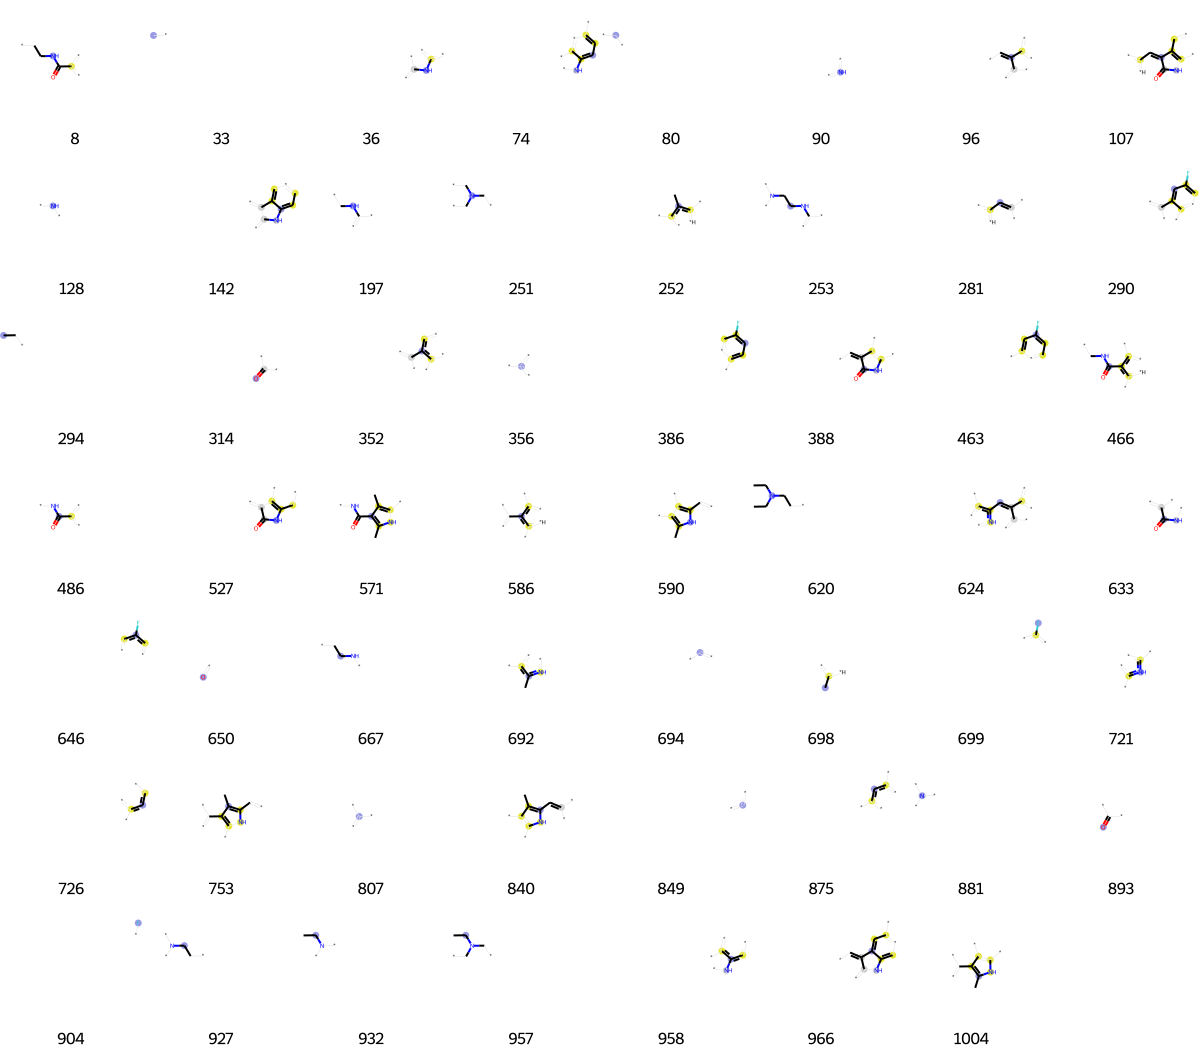

In [2551]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2552]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[19,
 32,
 64,
 70,
 73,
 114,
 128,
 136,
 191,
 202,
 236,
 262,
 323,
 333,
 343,
 356,
 378,
 383,
 393,
 419,
 428,
 429,
 448,
 454,
 467,
 489,
 491,
 500,
 571,
 641,
 673,
 708,
 709,
 726,
 786,
 794,
 809,
 842,
 843,
 849,
 863,
 875,
 888,
 896,
 904,
 915]

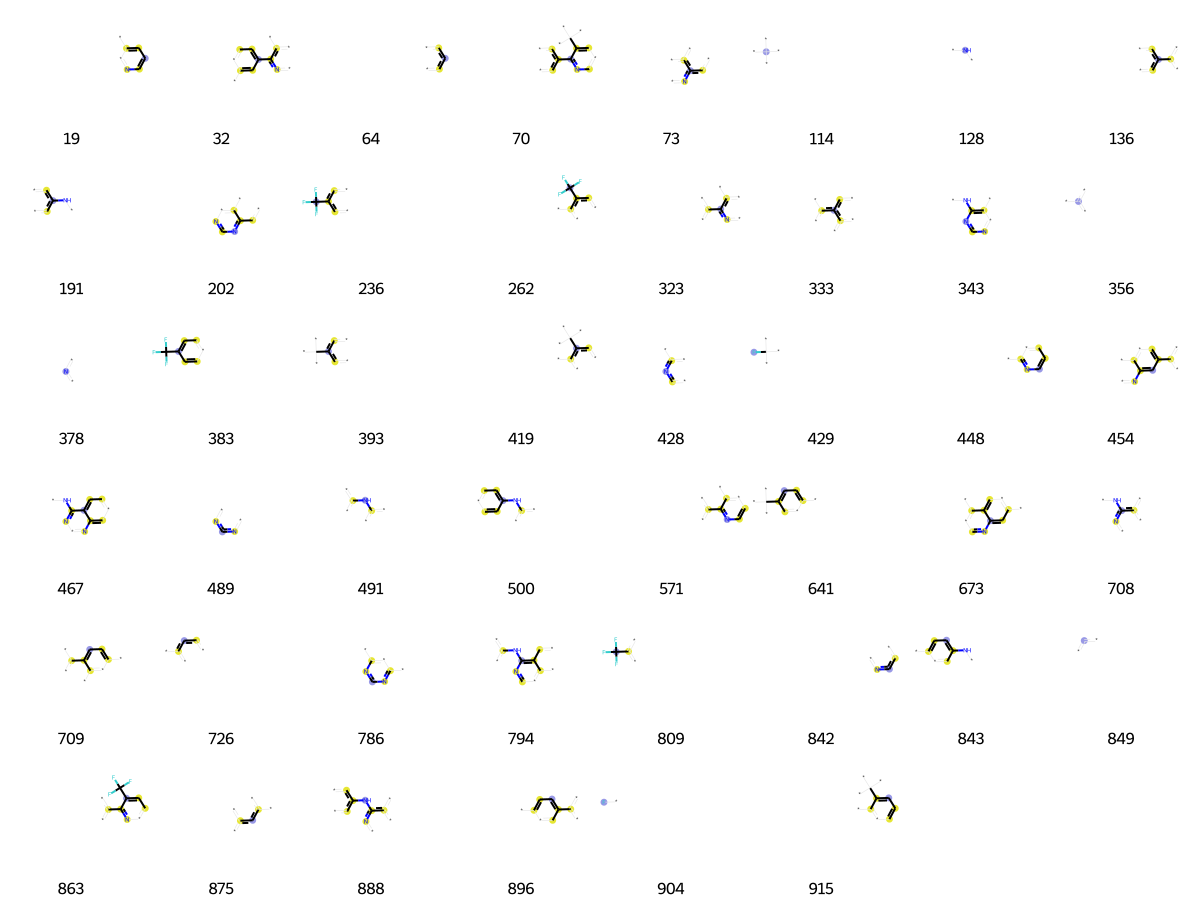

In [2553]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2554]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[15,
 64,
 80,
 147,
 165,
 209,
 216,
 237,
 282,
 301,
 322,
 356,
 378,
 381,
 428,
 433,
 435,
 477,
 489,
 504,
 523,
 548,
 561,
 562,
 565,
 584,
 592,
 654,
 656,
 659,
 672,
 695,
 716,
 726,
 745,
 757,
 758,
 786,
 803,
 849,
 857,
 873,
 875,
 886,
 926,
 932,
 935,
 950,
 960,
 1019]

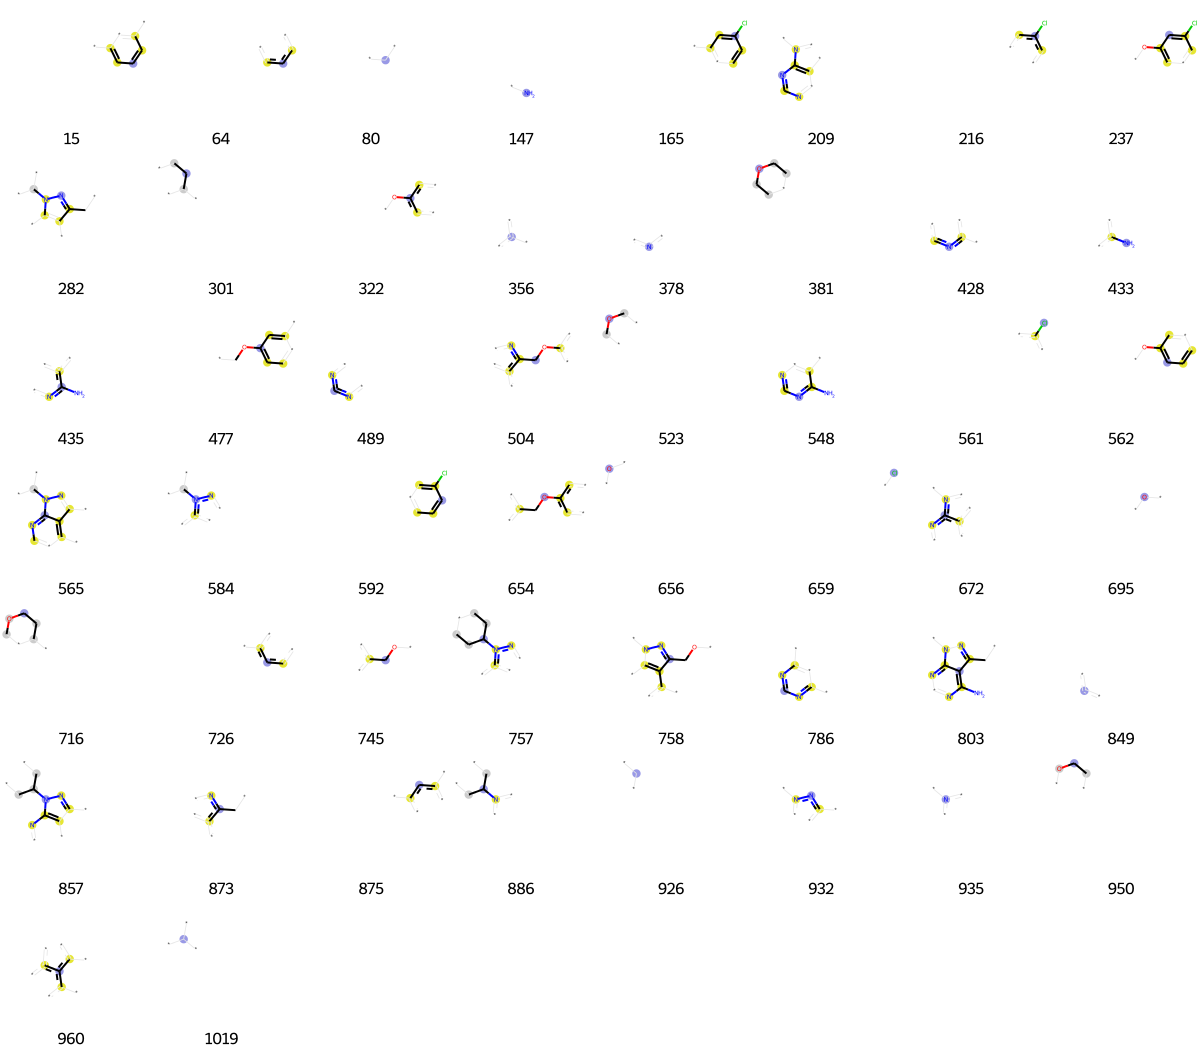

In [2555]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2556]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 47,
 56,
 80,
 81,
 114,
 128,
 139,
 191,
 255,
 259,
 262,
 342,
 345,
 350,
 356,
 361,
 378,
 392,
 402,
 406,
 419,
 428,
 429,
 452,
 458,
 460,
 486,
 491,
 500,
 511,
 544,
 557,
 558,
 562,
 587,
 613,
 624,
 641,
 650,
 673,
 678,
 692,
 702,
 708,
 726,
 786,
 807,
 809,
 831,
 842,
 843,
 849,
 856,
 873,
 881,
 893,
 904,
 930,
 933]

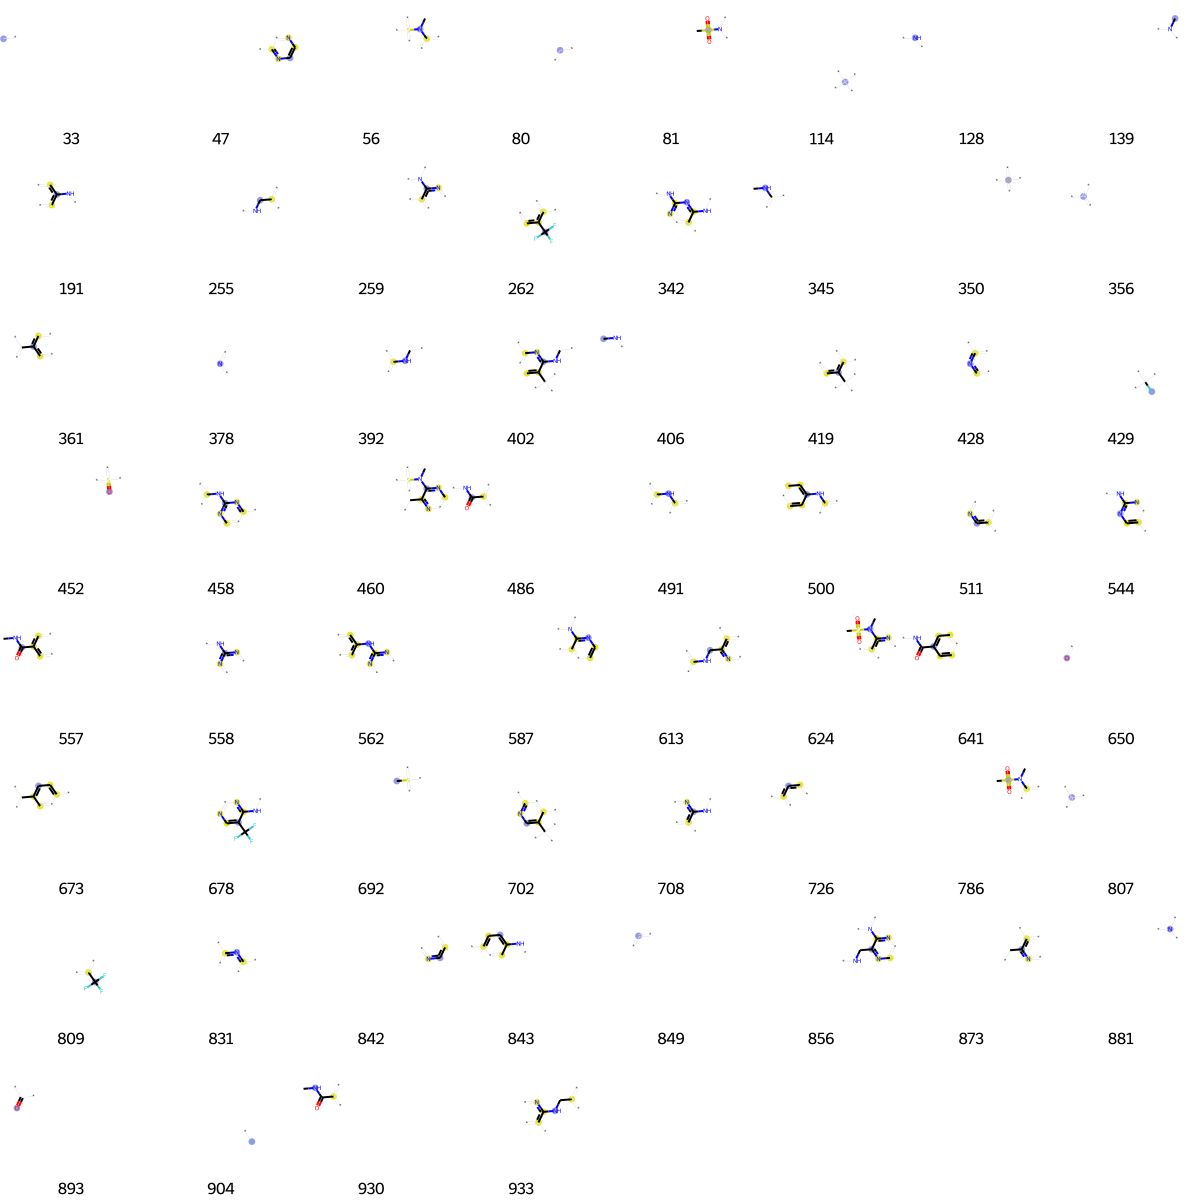

In [2557]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2558]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[6,
 10,
 13,
 15,
 29,
 32,
 33,
 45,
 63,
 64,
 73,
 80,
 147,
 203,
 231,
 260,
 271,
 301,
 312,
 322,
 335,
 356,
 378,
 379,
 407,
 428,
 449,
 456,
 477,
 486,
 527,
 564,
 577,
 623,
 635,
 656,
 676,
 677,
 695,
 700,
 704,
 718,
 726,
 808,
 831,
 841,
 849,
 875,
 893,
 926,
 932,
 935,
 954,
 997,
 1000,
 1005,
 1019]

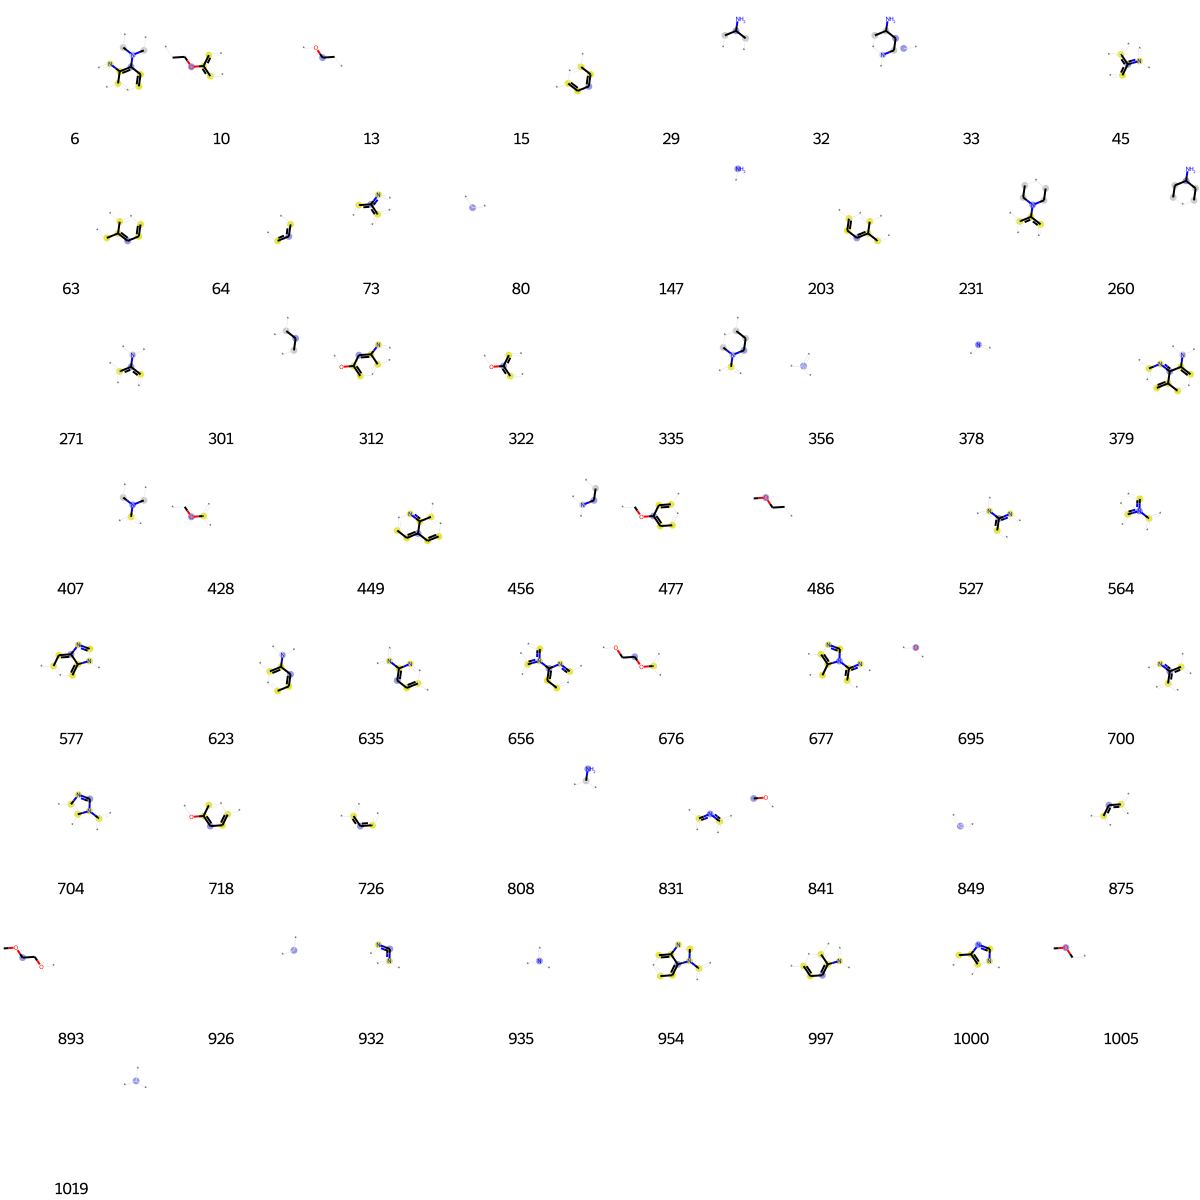

In [2559]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])